# Data Mining And Visualization - 83676
---

##### Ido Sar Shalom, 212410146.
##### Tomer Griba, 325105625.

### Course Project - Part 1
---

###  Table of contents 
---

* [Data Information](#Data-Information)
    * [Types of attributes](#Types-of-attributes)
    * [Missing values](#Missing-values)
        * [Year_Birth](#Year_Birth)
        * [Status](#Status)
        * [Income](#Income)
        * [Mnt_sweet](#Mnt_sweet)
        * [Num_of_Teen](#Num_of_Teen)
        * [Num_Web_Purchases](#Num_Web_Purchases)
        * [Response_Campaign_1](#Response_Campaign_1)
    * [Outliers](#Outliers)
    * [Delete attributes](#Delete-attributes)
* [Data Statistics](#Data-Statistics)
    * [Numerical data](#Numerical-data)
        * [Skewness](#Skewness)
        * [Mode](#Mode)
        * [Statistic information](#Statistic-information)
    * [Nominal data](#Nominal-data)
* [Normalization](#Normalization)
* [PCA](#PCA)
* [Discretization](#Discretization)

In [901]:
# imports for the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Data Information
---
* We are working with the marketing campaign dataset
* On this section we will examine the data and take a look on it 

In [902]:
df = pd.read_csv("./Marketing_Campaign_Train.csv")  # Create a pandas object to read the data from the csv file

In [903]:
print("Shape: ", df.shape)  # shape (samples, attributes) 
df.head(n=8)  # List the first 8 rows of the data-base

Shape:  (1680, 29)


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
0,5376,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,42,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
1,6862,1971.0,Graduation,Divorced,1730.0,0.0,0.0,18/05/2014,65,1.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
2,10749,1991.0,Graduation,Single,8028.0,0.0,0.0,18/09/2012,62,73.0,...,38.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
3,238,1967.0,2n Cycle,Together,67309.0,1.0,1.0,23/01/2013,76,515.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
4,1501,1982.0,PhD,Married,160803.0,0.0,0.0,04/08/2012,21,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
5,8475,1973.0,PhD,Married,157243.0,0.0,1.0,01/03/2014,98,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
6,9931,1963.0,PhD,Married,4023.0,1.0,1.0,23/06/2014,29,5.0,...,38.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
7,8148,1956.0,Master,Together,50898.0,1.0,1.0,08/01/2013,88,285.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0


1680 samples with 29 attributes (features)

### Types of attributes 
---
On this sub-section: 
* we gother information about the DataFrame (index dtype and columns, non-null values and memory usage.)
* handle missing values  


In [904]:
df.info()  # Get the type of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Education              1672 non-null   object 
 3   Status                 1646 non-null   object 
 4   Income                 1609 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1660 non-null   float64
 7   Registration_date      1680 non-null   object 
 8   Recency                1680 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null   float64
 15  Num_

* we have 1680 samples, so every attribute with less then 1680 non-null (in the "Non-Null Count") has some missing information


* check the attributes who has missing values 

In [905]:
df_missing_values = df.isnull().sum(axis=0)>1
display(df_missing_values)

missing_values_cols = []

for col in df_missing_values.index:
    if df_missing_values[col] == True:
        missing_values_cols.append(col)

        
print(missing_values_cols)

ID                       False
Year_Birth                True
Education                 True
Status                    True
Income                    True
Num_of_kids               True
Num_of_Teen               True
Registration_date        False
Recency                  False
Mnt_Fruits                True
Mnt_Meat                  True
Mnt_sweet                 True
Mnt_Wines                 True
Mnt_Gold_Products         True
Mnt_Fish                  True
Num_Web_Purchases         True
Num_Store_Purchases       True
Num_Deals_Purchases       True
Num_Catalog_Purchases     True
Num_Web_Visits            True
Response_Campaign_1       True
Response_Campaign_2       True
Response_Campaign_3       True
Response_Campaign_4       True
Response_Campaign_5       True
Complain                  True
Cost_Contact              True
Revenue                   True
Response                 False
dtype: bool

['Year_Birth', 'Education', 'Status', 'Income', 'Num_of_kids', 'Num_of_Teen', 'Mnt_Fruits', 'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products', 'Mnt_Fish', 'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases', 'Num_Catalog_Purchases', 'Num_Web_Visits', 'Response_Campaign_1', 'Response_Campaign_2', 'Response_Campaign_3', 'Response_Campaign_4', 'Response_Campaign_5', 'Complain', 'Cost_Contact', 'Revenue']


In [906]:
df.describe(include='all')

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
count,1680.000000,1651.000000,1672,1646,1609.000000,1672.000000,1660.000000,1680,1680.000000,1673.000000,...,1673.000000,1662.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.0,1673.0,1680.000000
unique,NaN,NaN,5,6,NaN,NaN,NaN,634,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,14/02/2013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,830,653,NaN,NaN,NaN,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5584.735714,1969.047244,NaN,NaN,51983.554382,0.454545,0.503614,NaN,48.890476,303.676031,...,10.602510,0.076414,0.071727,0.072325,0.065152,0.013748,0.008966,3.0,11.0,0.148214
std,3233.716033,11.937421,NaN,NaN,26567.679664,0.538492,0.544011,NaN,29.091872,340.672889,...,5.030212,0.265739,0.258113,0.259103,0.246868,0.116477,0.094291,0.0,0.0,0.355418
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2862.500000,1959.500000,NaN,NaN,34596.000000,0.000000,0.000000,NaN,24.000000,23.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5511.000000,1970.000000,NaN,NaN,50611.000000,0.000000,0.000000,NaN,50.000000,167.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8395.500000,1978.000000,NaN,NaN,67716.000000,1.000000,1.000000,NaN,74.000000,508.000000,...,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [907]:
redundant_rows = df[df.isnull().sum(axis=1)>=6].index
print(redundant_rows,'\n')

df = df.drop(redundant_rows)  # update the dataframe
df.info()

Int64Index([ 502,  509,  634,  936, 1151, 1464, 1502, 1639, 1659, 1662, 1663,
            1665, 1666, 1673, 1675],
           dtype='int64') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1665 non-null   int64  
 1   Year_Birth             1644 non-null   float64
 2   Education              1665 non-null   object 
 3   Status                 1639 non-null   object 
 4   Income                 1602 non-null   float64
 5   Num_of_kids            1665 non-null   float64
 6   Num_of_Teen            1653 non-null   float64
 7   Registration_date      1665 non-null   object 
 8   Recency                1665 non-null   int64  
 9   Mnt_Fruits             1665 non-null   float64
 10  Mnt_Meat               1665 non-null   float64
 11  Mnt_sweet              1651 non-null   float64
 12  Mnt_Wines        

In [908]:
df_missing_values = df.isnull().sum(axis=0)>1
display(df_missing_values)


missing_values_cols = []

for col in df_missing_values.index:
    if df_missing_values[col] == True:
        missing_values_cols.append(col)

print(missing_values_cols)

ID                       False
Year_Birth                True
Education                False
Status                    True
Income                    True
Num_of_kids              False
Num_of_Teen               True
Registration_date        False
Recency                  False
Mnt_Fruits               False
Mnt_Meat                 False
Mnt_sweet                 True
Mnt_Wines                False
Mnt_Gold_Products        False
Mnt_Fish                 False
Num_Web_Purchases         True
Num_Store_Purchases      False
Num_Deals_Purchases      False
Num_Catalog_Purchases    False
Num_Web_Visits           False
Response_Campaign_1       True
Response_Campaign_2      False
Response_Campaign_3      False
Response_Campaign_4      False
Response_Campaign_5      False
Complain                 False
Cost_Contact             False
Revenue                  False
Response                 False
dtype: bool

['Year_Birth', 'Status', 'Income', 'Num_of_Teen', 'Mnt_sweet', 'Num_Web_Purchases', 'Response_Campaign_1']


In [909]:
for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')
#   display(df[df_missing])

Attribute  Year_Birth has  21  missing values
Attribute  Status has  26  missing values
Attribute  Income has  63  missing values
Attribute  Num_of_Teen has  12  missing values
Attribute  Mnt_sweet has  14  missing values
Attribute  Num_Web_Purchases has  22  missing values
Attribute  Response_Campaign_1 has  11  missing values


In [910]:
df.describe(include='all')

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
count,1665.000000,1644.000000,1665,1639,1602.000000,1665.000000,1653.000000,1665,1665.000000,1665.000000,...,1665.000000,1654.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.0,1665.0,1665.000000
unique,NaN,NaN,5,6,NaN,NaN,NaN,631,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,14/02/2013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,825,652,NaN,NaN,NaN,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5584.605405,1969.064477,NaN,NaN,51955.667915,0.455255,0.503932,NaN,49.058859,303.903303,...,10.603003,0.076784,0.072072,0.072072,0.064865,0.013814,0.009009,3.0,11.0,0.148949
std,3231.372190,11.928300,NaN,NaN,26594.454729,0.538715,0.544188,NaN,29.062146,340.747873,...,5.033815,0.266328,0.258685,0.258685,0.246361,0.116753,0.094516,0.0,0.0,0.356145
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2870.000000,1960.000000,NaN,NaN,34596.000000,0.000000,0.000000,NaN,24.000000,23.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5510.000000,1970.000000,NaN,NaN,50510.500000,0.000000,0.000000,NaN,50.000000,167.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8395.000000,1978.000000,NaN,NaN,67590.250000,1.000000,1.000000,NaN,74.000000,508.000000,...,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


Convert 'Registration_date' column to pandas time functionality  

In [911]:
df['Registration_date'] = pd.to_datetime(df['Registration_date']) 
print(df['Registration_date'].dtype)  # type of 'Registration_date' attribute 
df['Registration_date'].head(n=5)

datetime64[ns]


0   2013-06-01
1   2014-05-18
2   2012-09-18
3   2013-01-23
4   2012-04-08
Name: Registration_date, dtype: datetime64[ns]

In [912]:
df['Registration_date'].describe(datetime_is_numeric=True, include='all')    

count                             1665
mean     2013-07-14 18:04:32.432432384
min                2012-01-09 00:00:00
25%                2013-01-26 00:00:00
50%                2013-07-12 00:00:00
75%                2014-01-02 00:00:00
max                2014-12-06 00:00:00
Name: Registration_date, dtype: object

* rank the Education attribute 
"Basic"-> 0, “2n Cycle” -> 1, “Graduation” -> 2, “Master” -> 3, “PhD” -> 4

     Category  Numeric
0       Basic        0
1    2n Cycle        1
2  Graduation        2
3      Master        3
4         PhD        4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     1665 non-null   int64         
 1   Year_Birth             1644 non-null   float64       
 2   Education              1665 non-null   int64         
 3   Status                 1639 non-null   object        
 4   Income                 1602 non-null   float64       
 5   Num_of_kids            1665 non-null   float64       
 6   Num_of_Teen            1653 non-null   float64       
 7   Registration_date      1665 non-null   datetime64[ns]
 8   Recency                1665 non-null   int64         
 9   Mnt_Fruits             1665 non-null   float64       
 10  Mnt_Meat               1665 non-null   flo

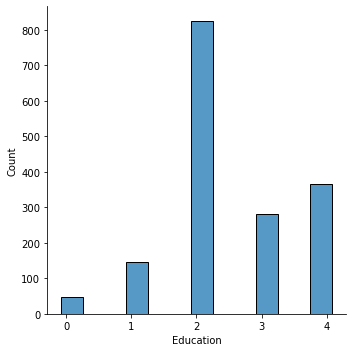

In [913]:
df["Education"].replace(['Basic','2n Cycle','Graduation', 'Master', 'PhD'], [0, 1, 2, 3, 4], inplace=True)
sns.displot(df["Education"], shrink=2)
plt.xticks([0, 1, 2, 3, 4])
print(pd.DataFrame(data={'Category': ['Basic','2n Cycle','Graduation', 'Master', 'PhD'],'Numeric': [0, 1, 2, 3, 4]}))

df.info()

In [914]:
df.describe(include='all', datetime_is_numeric=True)

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
count,1665.000000,1644.000000,1665.000000,1639,1602.000000,1665.000000,1653.000000,1665,1665.000000,1665.000000,...,1665.000000,1654.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.0,1665.0,1665.000000
unique,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,652,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5584.605405,1969.064477,2.462462,NaN,51955.667915,0.455255,0.503932,2013-07-14 18:04:32.432432384,49.058859,303.903303,...,10.603003,0.076784,0.072072,0.072072,0.064865,0.013814,0.009009,3.0,11.0,0.148949
min,0.000000,1893.000000,0.000000,NaN,1730.000000,0.000000,0.000000,2012-01-09 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2870.000000,1960.000000,2.000000,NaN,34596.000000,0.000000,0.000000,2013-01-26 00:00:00,24.000000,23.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5510.000000,1970.000000,2.000000,NaN,50510.500000,0.000000,0.000000,2013-07-12 00:00:00,50.000000,167.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8395.000000,1978.000000,3.000000,NaN,67590.250000,1.000000,1.000000,2014-01-02 00:00:00,74.000000,508.000000,...,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,4.000000,NaN,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,...,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


* Note the added values compare to previous 

### Missing values
---
On this sub-section: 
* We will complete missing values of attributes

In [915]:
sum1 = 0

for val in range(1,7,1):
    num = len(df[df.isnull().sum(axis=1)==val])
    print(num, 'rows has ', val,' missing values')
    sum1 += num * val
    
val = 7
num = len(df[df.isnull().sum(axis=1)>val])
print(num, 'rows has more than ', val,' missing values')

print(sum1)

155 rows has  1  missing values
7 rows has  2  missing values
0 rows has  3  missing values
0 rows has  4  missing values
0 rows has  5  missing values
0 rows has  6  missing values
0 rows has more than  7  missing values
169


In [916]:
df_missing_values = df.isnull().sum(axis=0)>1
display(df_missing_values)


missing_values_cols = []

for col in df_missing_values.index:
    if df_missing_values[col] == True:
        missing_values_cols.append(col)

print(missing_values_cols)

ID                       False
Year_Birth                True
Education                False
Status                    True
Income                    True
Num_of_kids              False
Num_of_Teen               True
Registration_date        False
Recency                  False
Mnt_Fruits               False
Mnt_Meat                 False
Mnt_sweet                 True
Mnt_Wines                False
Mnt_Gold_Products        False
Mnt_Fish                 False
Num_Web_Purchases         True
Num_Store_Purchases      False
Num_Deals_Purchases      False
Num_Catalog_Purchases    False
Num_Web_Visits           False
Response_Campaign_1       True
Response_Campaign_2      False
Response_Campaign_3      False
Response_Campaign_4      False
Response_Campaign_5      False
Complain                 False
Cost_Contact             False
Revenue                  False
Response                 False
dtype: bool

['Year_Birth', 'Status', 'Income', 'Num_of_Teen', 'Mnt_sweet', 'Num_Web_Purchases', 'Response_Campaign_1']


In [917]:
sum2 = 0

for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')
    sum2 += num_missing

print(sum2)
#   display(df[df_missing])

Attribute  Year_Birth has  21  missing values
Attribute  Status has  26  missing values
Attribute  Income has  63  missing values
Attribute  Num_of_Teen has  12  missing values
Attribute  Mnt_sweet has  14  missing values
Attribute  Num_Web_Purchases has  22  missing values
Attribute  Response_Campaign_1 has  11  missing values
169


### Year_Birth

C:\Users\Tomer\AppData\Local\Temp/ipykernel_11964/3522429455.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["Year_Birth"][row] = df["Year_Birth"][row] = np.random.randint(1945, 1970)


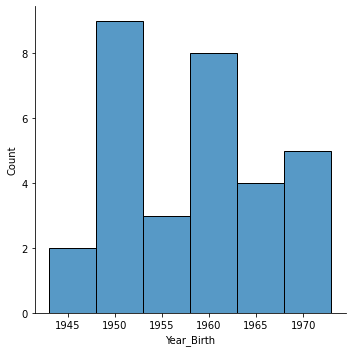

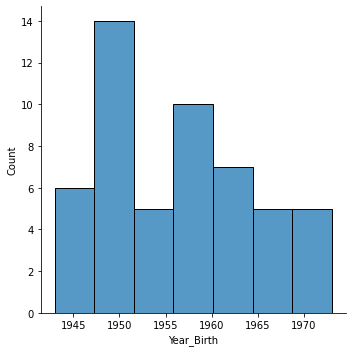

In [918]:
# a = df[df["Status"]=="Widow"]
# b = a["Year_Birth"][a["Year_Birth"].isnull()==False].to_list()
# b.__len__()
a = df[df["Status"]=="Widow"]
sns.displot(a["Year_Birth"])
missing_value_1 = df["Year_Birth"][df["Year_Birth"].isnull()]
for row in missing_value_1.index:
    a["Year_Birth"][row] = df["Year_Birth"][row] = np.random.randint(1945, 1970)
sns.displot(a["Year_Birth"])

# sns.displot(a["Year_Birth"])

In [919]:
sum2 = 0

for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')
    sum2 += num_missing

print(sum2)

Attribute  Year_Birth has  0  missing values
Attribute  Status has  26  missing values
Attribute  Income has  63  missing values
Attribute  Num_of_Teen has  12  missing values
Attribute  Mnt_sweet has  14  missing values
Attribute  Num_Web_Purchases has  22  missing values
Attribute  Response_Campaign_1 has  11  missing values
148


### Status

In [920]:
# remove "alone"
df = df.drop((df.loc[df["Status"] == "Alone"].index))
df["Status"].unique()

array(['Married', 'Divorced', 'Single', 'Together', 'Widow', nan],
      dtype=object)

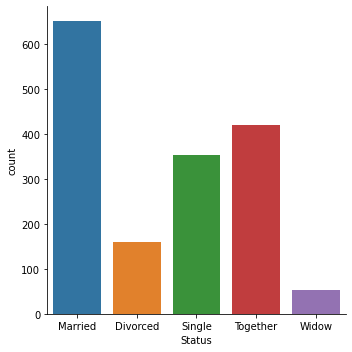

In [921]:
sns.catplot(x="Status", kind="count", data=df)

In [922]:
df["Status_cat"] = df["Status"].copy()
print(df["Status_cat"].unique())
df["Status_cat"].replace(['Single','Together', 'Divorced', 'Widow', 'Married'], [1, 2, 3, 4, 5], inplace=True)

corr_1 = df.corr(method = 'pearson')
print(corr_1['Status_cat'].nlargest(5))
print(corr_1['Status_cat'].nsmallest(5))

['Married' 'Divorced' 'Single' 'Together' 'Widow' nan]
Status_cat               1.000000
Num_of_Teen              0.067526
Num_Web_Purchases        0.040262
Education                0.036205
Num_Catalog_Purchases    0.027140
Name: Status_cat, dtype: float64
Response              -0.089310
Mnt_sweet             -0.039704
Year_Birth            -0.034732
Response_Campaign_5   -0.028926
Mnt_Wines             -0.024646
Name: Status_cat, dtype: float64


* we can tell that there is not enough correlation between "Status_cat" and other attributes

['Married' 'Divorced' 'Single' 'Together' 'Widow']


C:\Users\Tomer\AppData\Local\Temp/ipykernel_11964/4113449459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Status"][row] = random.choice(df["Status"][df["Status"].isnull()==False].values)


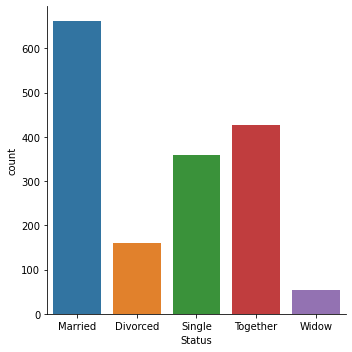

In [923]:
# we will now try to keep the same distribution as before so:

missing_value_status = df["Status"][df["Status"].isnull()]
if len(missing_value_status.index) !=0:
    for row in missing_value_status.index:
        df["Status"][row] = random.choice(df["Status"][df["Status"].isnull()==False].values)

else:
    print("no nan values")
print(df["Status"].unique())

sns.catplot(x="Status", kind="count", data=df)

### Income

Income                   1.000000
Mnt_all                  0.635799
Num_Deals_Purchases      0.579677
Mnt_sweet                0.571893
Mnt_Fruits               0.548197
Num_Catalog_Purchases    0.497389
Mnt_Gold_Products        0.408878
Mnt_Wines                0.405197
Mnt_Meat                 0.400497
Num_Store_Purchases      0.353097
Response_Campaign_3      0.313528
Mnt_Fish                 0.299568
Response_Campaign_4      0.252265
Response_Campaign_2      0.181361
Education                0.143255
Name: Income, dtype: float64
Num_Web_Visits      -0.500064
Num_of_kids         -0.397884
Year_Birth          -0.147803
Num_Web_Purchases   -0.047782
Complain            -0.008520
Name: Income, dtype: float64


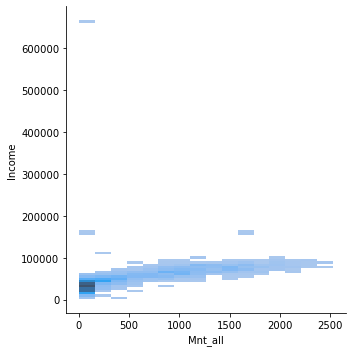

In [924]:
df["Mnt_all"] = df["Mnt_sweet"] + df["Mnt_Fruits"] + df["Mnt_Gold_Products"] + df["Mnt_Wines"] + df["Mnt_Meat"] + df["Mnt_Fish"]

corr_1 = df.corr(method = 'pearson')
print(corr_1['Income'].nlargest(15))
print(corr_1['Income'].nsmallest(5))

sns.displot(x="Mnt_all", y="Income", data=df)

* complete missing values of Income attribute

In [925]:
missing_value_Income = df[df["Income"].isnull()]

for row in missing_value_Income.index:
    b = df["Mnt_all"][row]
    a = df[df["Mnt_all"] > b - 5]
    c = a[df["Mnt_all"] < b + 5]
    if c.empty:
        print("empty_on_first_one! ")
        a = df[df["Mnt_all"] > b -15]
        c = a[df["Mnt_all"] < b + 15]
    if c.empty:
        print("always empty!  ;)")
        c = df        
    df["Income"][row] = (c["Income"][c["Income"].isnull()==False]).mean()

empty_on_first_one! 
always empty!  ;)


C:\Users\Tomer\AppData\Local\Temp/ipykernel_11964/2638013667.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = a[df["Mnt_all"] < b + 5]
C:\Users\Tomer\AppData\Local\Temp/ipykernel_11964/2638013667.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Income"][row] = (c["Income"][c["Income"].isnull()==False]).mean()
C:\Users\Tomer\AppData\Local\Temp/ipykernel_11964/2638013667.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = a[df["Mnt_all"] < b + 15]


* check NaN values

In [926]:
sum2 = 0

for col in missing_values_cols:
    df_missing = df[col].isnull()
    num_missing = df_missing.sum(axis=0)
    print('Attribute ', col, 'has ', num_missing,' missing values')
    sum2 += num_missing

print(sum2)

Attribute  Year_Birth has  0  missing values
Attribute  Status has  0  missing values
Attribute  Income has  0  missing values
Attribute  Num_of_Teen has  12  missing values
Attribute  Mnt_sweet has  14  missing values
Attribute  Num_Web_Purchases has  22  missing values
Attribute  Response_Campaign_1 has  11  missing values
59


### Mnt_sweet

In [927]:
corr_1 = df.corr(method = 'pearson')
print(corr_1['Mnt_sweet'].nlargest(5))
print(corr_1['Mnt_sweet'].nsmallest(5))

Mnt_sweet              1.000000
Mnt_all                0.842047
Num_Deals_Purchases    0.751636
Income                 0.576041
Mnt_Fruits             0.560922
Name: Mnt_sweet, dtype: float64
Num_Web_Visits      -0.526420
Num_of_kids         -0.433358
Num_of_Teen         -0.256357
Num_Web_Purchases   -0.091956
Status_cat          -0.039704
Name: Mnt_sweet, dtype: float64


In [928]:
missing_value_sweet = df[df["Mnt_sweet"].isnull()]

for row in missing_value_sweet.index:
    b = df["Num_Deals_Purchases"][row]
    a = df[df["Num_Deals_Purchases"] > b -1]
    c = a[df["Num_Deals_Purchases"] < b + 1]
    if c.empty:
        print("empty_on_first_one! ")
        a = df[df["Num_Deals_Purchases"] > b -2]
        c = a[df["Num_Deals_Purchases"] < b + 2]
    if c.empty:
        print("always empty! ;)")
        c = df        
    df["Mnt_sweet"][row] = (c["Mnt_sweet"][c["Mnt_sweet"].isnull()==False]).mean()

C:\Users\Tomer\AppData\Local\Temp/ipykernel_11964/516328937.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = a[df["Num_Deals_Purchases"] < b + 1]
C:\Users\Tomer\AppData\Local\Temp/ipykernel_11964/516328937.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mnt_sweet"][row] = (c["Mnt_sweet"][c["Mnt_sweet"].isnull()==False]).mean()


### Num_of_Teen

In [929]:
corr_1 = df.corr(method = 'pearson')
print(corr_1['Num_of_Teen'].nlargest(5))
print(corr_1['Num_of_Teen'].nsmallest(5))
print(df["Num_Web_Purchases"].unique())
print(df["Num_of_Teen"].unique())

Num_of_Teen            1.000000
Num_Web_Purchases      0.385904
Num_Store_Purchases    0.169074
Education              0.144504
Num_Web_Visits         0.141695
Name: Num_of_Teen, dtype: float64
Year_Birth            -0.374362
Mnt_sweet             -0.252079
Mnt_Wines             -0.187489
Response_Campaign_3   -0.176355
Mnt_Meat              -0.163436
Name: Num_of_Teen, dtype: float64
[15. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0. nan]
[ 0.  1.  2. nan]


In [930]:
missing_value_sweet = df[df["Num_of_Teen"].isnull()]

for row in missing_value_sweet.index:
    b = df["Num_Web_Purchases"][row]
    a = df[df["Num_Web_Purchases"] > b -1]
    c = a[df["Num_Web_Purchases"] < b + 1]
    if c.empty:
        print("empty_on_first_one! ")
        a = df[df["Num_Web_Purchases"] > b -2]
        c = a[df["Num_Web_Purchases"] < b + 2]
    if c.empty:
        print("always empty! ;)")
        c = df        
    df["Num_of_Teen"][row] = int((c["Num_of_Teen"][c["Num_of_Teen"].isnull()==False]).mean())

C:\Users\Tomer\AppData\Local\Temp/ipykernel_11964/3647383370.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = a[df["Num_Web_Purchases"] < b + 1]
C:\Users\Tomer\AppData\Local\Temp/ipykernel_11964/3647383370.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_of_Teen"][row] = int((c["Num_of_Teen"][c["Num_of_Teen"].isnull()==False]).mean())


### Num_Web_Purchases

In [931]:
corr_1 = df.corr(method = 'pearson')
print(corr_1['Num_Web_Purchases'].nlargest(5))
print(corr_1['Num_Web_Purchases'].nsmallest(5))

Num_Web_Purchases      1.000000
Num_of_Teen            0.383396
Num_Web_Visits         0.317439
Num_Store_Purchases    0.221266
Num_of_kids            0.198470
Name: Num_Web_Purchases, dtype: float64
Response_Campaign_3   -0.167959
Mnt_Meat              -0.133329
Mnt_Wines             -0.127942
Mnt_Gold_Products     -0.118422
Response_Campaign_4   -0.098310
Name: Num_Web_Purchases, dtype: float64


In [932]:
missing_value_sweet = df[df["Num_Web_Purchases"].isnull()]

for row in missing_value_sweet.index:
    b = df["Num_of_Teen"][row]
    a = df[df["Num_of_Teen"] > b - 1]
    c = a[df["Num_of_Teen"] < b + 1]
    if c.empty:
        print("empty_on_first_one! ")
        a = df[df["Num_of_Teen"] > b - 2]
        c = a[df["Num_of_Teen"] < b + 2]

    if c.empty:
        print("always empty! ;)")
        c = df        
    df["Num_Web_Purchases"][row] = int((c["Num_Web_Purchases"][c["Num_Web_Purchases"].isnull()==False]).mean())

C:\Users\Tomer\AppData\Local\Temp/ipykernel_11964/1137775252.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_Web_Purchases"][row] = int((c["Num_Web_Purchases"][c["Num_Web_Purchases"].isnull()==False]).mean())
C:\Users\Tomer\AppData\Local\Temp/ipykernel_11964/1137775252.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = a[df["Num_of_Teen"] < b + 1]


### Response_Campaign_1

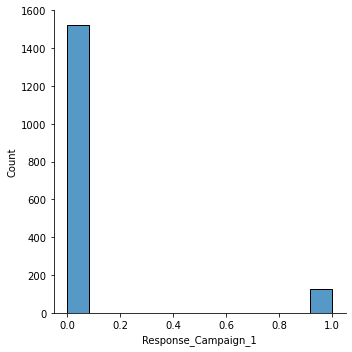

In [933]:
sns.displot(df["Response_Campaign_1"])

In [934]:
corr_1 = df.corr(method = 'pearson')
print(corr_1['Response_Campaign_1'].nlargest(5))
print(corr_1['Response_Campaign_1'].nsmallest(5))

Response_Campaign_1    1.000000
Response               0.243112
Mnt_Fish               0.122733
Num_Deals_Purchases    0.110094
Response_Campaign_4    0.089144
Name: Response_Campaign_1, dtype: float64
Response_Campaign_2     -0.080402
Recency                 -0.051584
Num_Catalog_Purchases   -0.048286
ID                      -0.042944
Num_of_Teen             -0.028753
Name: Response_Campaign_1, dtype: float64


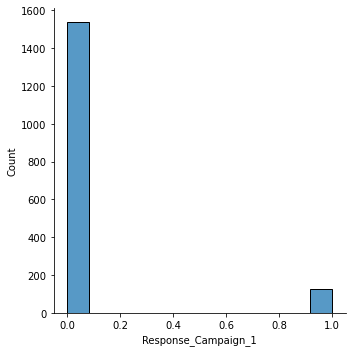

In [935]:
df["Response"][df["Response_Campaign_1"].isnull()]
df["Response_Campaign_1"] = df["Response_Campaign_1"].fillna(0)

sns.displot(df["Response_Campaign_1"])

In [936]:
# Update the added attributes 
df["Mnt_all"] = df["Mnt_sweet"] + df["Mnt_Fruits"] + df["Mnt_Gold_Products"] + df["Mnt_Wines"] + df["Mnt_Meat"] + df["Mnt_Fish"]
df["Status_cat"] = df["Status"].copy()
df["Status_cat"].replace(['Single','Together', 'Divorced', 'Widow', 'Married'], [1, 2, 3, 4, 5], inplace=True)

### Outliers

In [937]:
year_birth = df['Year_Birth']
year_birth_mean, year_birth_std = np.mean(year_birth), np.std(year_birth)
cut_off = year_birth_std * 3
lower, upper = year_birth_mean - cut_off, year_birth_mean + cut_off
display(df.loc[(df['Year_Birth'] > upper) | (df['Year_Birth'] < lower)])

# this is an outlier
df = df.drop(df.loc[(df['Year_Birth'] > upper) | (df['Year_Birth'] < lower)].index)
display(df.loc[(df['Year_Birth'] > upper) | (df['Year_Birth'] < lower)])



,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all
1184,1150,1899.0,4,Together,83532.0,0.0,0.0,2013-09-26,36,755.0,...,0.0,1.0,0.0,0.0,0.0,3.0,11.0,0,2,1853.0
1217,11004,1893.0,1,Single,60182.0,0.0,1.0,2014-05-17,23,8.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,1,22.0


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all


In [938]:
df["Education"].unique()
# no outliers

array([2, 1, 4, 3, 0], dtype=int64)

In [939]:
print(df["Status"].unique())

# Update Status_cat
df["Status_cat"] = df["Status"].copy()
df["Status_cat"].replace(['Single','Together', 'Divorced', 'Widow', 'Married'], [1, 2, 3, 4, 5], inplace=True)

print(df["Status_cat"].unique())

['Married' 'Divorced' 'Single' 'Together' 'Widow']
[5 3 1 2 4]


* only possible outlier is "Alone"

In [940]:
display(df["Income"].describe())
data = df['Income']
data_mean, data_std = np.mean(data), np.std(data)
cut_off = data_std * 5
lower, upper = data_mean - cut_off, data_mean + cut_off
df = df.drop(df.loc[(df['Income'] > upper) | (df['Income'] < lower)].index)
display(df.loc[(df['Income'] > upper) | (df['Income'] < lower)])

count      1661.000000
mean      51958.206526
std       26374.182816
min        1730.000000
25%       34529.000000
50%       50353.000000
75%       67605.000000
max      666666.000000
Name: Income, dtype: float64

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all


In [941]:
print(df["Num_of_kids"].unique())

[1. 0. 2.]


does not seem to have outlier

In [942]:
print(df["Num_of_Teen"].unique())

[0. 1. 2.]


does not seem to have outlier

In [943]:
print(df["Registration_date"].describe(datetime_is_numeric=True))

count                             1660
mean     2013-07-14 06:22:33.253011968
min                2012-01-09 00:00:00
25%                2013-01-26 00:00:00
50%                2013-07-12 00:00:00
75%                2014-01-01 06:00:00
max                2014-12-06 00:00:00
Name: Registration_date, dtype: object


does not seem to have outlier

In [944]:
print(df["Recency"].describe())
data = df['Recency']
data_mean, data_std = np.mean(data), np.std(data)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
df.loc[(df['Recency'] > upper) | (df['Recency'] < lower)]

count    1660.000000
mean       49.124699
std        29.075251
min         0.000000
25%        24.000000
50%        50.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all


since no one is above upper or below lower then it does not seem to have outlier

count    1660.000000
mean      304.028916
std       340.801129
min         0.000000
25%        23.000000
50%       167.000000
75%       508.000000
max      1493.000000
Name: Mnt_Fruits, dtype: float64
0.0   1.4746987951807229
149.3   1.1397590361445784
298.6   1.103012048192771
447.90000000000003   1.0885542168674698
597.2   1.063855421686747
746.5   1.0439759036144578
895.8000000000001   1.0433734939759036
1045.1000000000001   1.0210843373493976
1194.4   1.0150602409638554
1343.7   1.0066265060240964


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all
137,1665,1964.0,4,Divorced,64140.0,0.0,2.0,2013-09-23,71,1459.0,...,0.0,1.0,0.0,1.0,0.0,3.0,11.0,1,3,1750.0
599,1103,1976.0,3,Married,81929.0,1.0,0.0,2012-09-29,60,1486.0,...,0.0,1.0,0.0,0.0,0.0,3.0,11.0,1,5,2053.0
755,737,1949.0,4,Married,80360.0,0.0,0.0,2013-03-03,56,1493.0,...,1.0,1.0,1.0,0.0,0.0,3.0,11.0,0,5,2231.0
795,9260,1945.0,4,Married,70356.0,0.0,0.0,2012-05-11,20,1349.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,1706.0
1080,3174,1959.0,2,Together,87771.0,0.0,1.0,2013-05-22,61,1492.0,...,1.0,1.0,1.0,1.0,0.0,3.0,11.0,1,2,1957.0
1084,4943,1953.0,2,Married,70503.0,0.0,0.0,2012-09-30,73,1379.0,...,1.0,1.0,0.0,0.0,0.0,3.0,11.0,0,5,1727.0
1121,8362,1982.0,4,Married,84169.0,0.0,0.0,2013-07-08,9,1478.0,...,1.0,1.0,0.0,0.0,0.0,3.0,11.0,1,5,1919.0
1326,5547,1982.0,4,Married,84169.0,0.0,0.0,2013-07-08,9,1478.0,...,1.0,1.0,0.0,0.0,0.0,3.0,11.0,1,5,1919.0
1338,5536,1959.0,2,Together,87771.0,0.0,1.0,2013-05-22,61,1492.0,...,1.0,1.0,1.0,1.0,0.0,3.0,11.0,1,2,1957.0
1409,4580,1969.0,2,Married,75759.0,0.0,0.0,2013-10-25,46,1394.0,...,0.0,1.0,1.0,0.0,0.0,3.0,11.0,1,5,2486.0


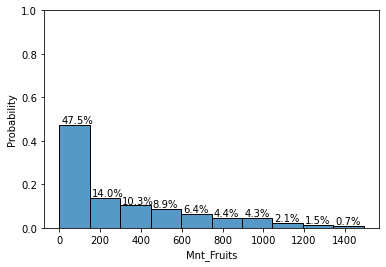

In [945]:
print(df["Mnt_Fruits"].describe())
data = df['Mnt_Fruits']

a_1 = sns.histplot(df['Mnt_Fruits'], bins=10, stat="probability")
for r in a_1.patches:
    h_1 = r.get_height()
    x_2 = r.get_x()
    print(x_2, " ", h_1+1)
    a_1.annotate("{:.1f}%".format(h_1*100), xy=(x_2+10, h_1+0.008))
plt.ylim(0, 1)

# the upper value is the last bin
upper = df['Mnt_Fruits'].max() - ((df['Mnt_Fruits'].max()-df['Mnt_Fruits'].min())/10)


display(df.loc[df['Mnt_Fruits'] > upper])
df = df.drop(df.loc[df['Mnt_Fruits'] > upper].index)

count    1649.000000
mean       25.054579
std        38.606641
min         0.000000
25%         1.000000
50%         8.000000
75%        30.000000
max       199.000000
Name: Mnt_Meat, dtype: float64
0.0   1.6755609460278957
19.9   1.1164342025469982
39.8   1.063068526379624
59.699999999999996   1.0400242571255307
79.6   1.031534263189812
99.5   1.0230442692540933
119.39999999999999   1.0230442692540933
139.29999999999998   1.0115221346270467
159.2   1.0103092783505154
179.1   1.0054578532443905


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all
57,1456,1979.0,2,Single,60474.0,0.0,1.0,2013-01-04,25,265.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,1,1180.0
618,3283,1972.0,1,Married,70932.0,0.0,1.0,2014-01-19,57,200.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,909.0
952,1137,1964.0,2,Single,81246.0,0.0,0.0,2013-12-29,87,398.0,...,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0,1,1379.0
1179,9242,1990.0,2,Single,64509.0,0.0,0.0,2013-08-17,19,836.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1,1,1722.0
1564,10102,1968.0,2,Widow,79946.0,0.0,0.0,2014-12-05,19,395.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,4,1478.0
1592,10991,1960.0,3,Married,89058.0,0.0,0.0,2012-07-12,18,454.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,850.0
1606,8091,1956.0,2,Married,63943.0,0.0,1.0,2012-02-09,50,423.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,1106.0
1635,9589,1948.0,4,Widow,82032.0,0.0,0.0,2014-05-04,54,332.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,4,1234.0
1644,202,1948.0,4,Widow,82032.0,0.0,0.0,2014-05-04,54,332.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,4,1234.0


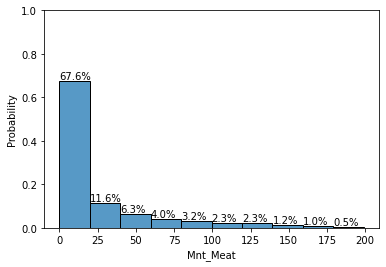

In [946]:
print(df["Mnt_Meat"].describe())
a_1 = sns.histplot(df['Mnt_Meat'], bins=10, stat="probability")
for r in a_1.patches:
    h_1 = r.get_height()
    x_2 = r.get_x()
    print(x_2, " ", h_1+1)
    a_1.annotate("{:.1f}%".format(h_1*100), xy=(x_2, h_1+0.008))
plt.ylim(0, 1)

# the upper value is the last bin
upper = df['Mnt_Meat'].max() - ((df['Mnt_Meat'].max()-df['Mnt_Meat'].min())/10)

display(df.loc[df['Mnt_Meat'] > upper])
df = df.drop(df.loc[df['Mnt_Meat'] > upper].index)

#### Mnt_sweet

count    1640.000000
mean      164.078719
std       226.562427
min         1.000000
25%        15.000000
50%        64.000000
75%       217.000000
max      1725.000000
Name: Mnt_sweet, dtype: float64
1.0   1.7085365853658536
173.4   1.1146341463414635
345.8   1.0853658536585367
518.2   1.0445121951219511
690.6   1.0335365853658536
863.0   1.0109756097560976
1035.4   1.0
1207.8   1.0
1380.2   1.0
1552.6000000000001   1.002439024390244


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all
0,5376,1979.0,2,Married,99257.333333,1.0,0.0,2013-06-01,42,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,1730.0
4,1501,1982.0,4,Married,160803.000000,0.0,0.0,2012-04-08,21,55.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,1717.0
5,8475,1973.0,4,Married,157243.000000,0.0,1.0,2014-01-03,98,20.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,1608.0
1646,4931,1977.0,2,Together,157146.000000,0.0,0.0,2013-04-29,13,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,1730.0


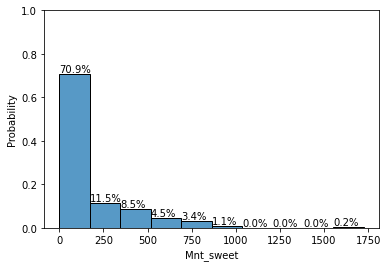

In [947]:
print(df["Mnt_sweet"].describe())

a_1 = sns.histplot(df['Mnt_sweet'], bins=10, stat="probability")
for r in a_1.patches:
    h_1 = r.get_height()
    x_2 = r.get_x()
    print(x_2, " ", h_1+1)
    a_1.annotate("{:.1f}%".format(h_1*100), xy=(x_2, h_1+0.008))
plt.ylim(0, 1)

# end of 5'th bin
upper = df['Mnt_sweet'].max() - 4*((df['Mnt_sweet'].max()-df['Mnt_sweet'].min())/10)
display(df.loc[df['Mnt_sweet'] > upper])
df = df.drop(df.loc[df['Mnt_sweet'] > upper].index)

#### Mnt_Wines

count    1636.000000
mean       35.663814
std        52.695543
min         0.000000
25%         3.000000
50%        11.000000
75%        46.000000
max       259.000000
Name: Mnt_Wines, dtype: float64
0.0   1.6583129584352079
25.9   1.1081907090464547
51.8   1.0733496332518337
77.69999999999999   1.0446210268948655
103.6   1.0311735941320292
129.5   1.0299511002444988
155.39999999999998   1.021393643031785
181.29999999999998   1.0140586797066016
207.2   1.0122249388753057
233.1   1.006723716381418


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all
803,4676,1951.0,3,Widow,73705.0,0.0,2.0,2014-05-03,86,612.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,4,1695.0
979,10619,1994.0,2,Single,95529.0,0.0,0.0,2012-03-12,29,770.0,...,0.0,1.0,0.0,0.0,0.0,3.0,11.0,1,1,1990.0
1158,5331,1977.0,2,Married,74985.0,0.0,0.0,2012-11-09,8,587.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,1869.0
1161,10965,1955.0,2,Together,76005.0,0.0,0.0,2013-02-22,72,983.0,...,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0,2,1722.0
1164,5453,1956.0,3,Married,90226.0,0.0,0.0,2012-09-26,26,1083.0,...,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0,5,2352.0
1182,8931,1986.0,2,Together,83033.0,1.0,0.0,2014-05-18,82,812.0,...,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0,2,1761.0
1195,0,1985.0,2,Married,70951.0,0.0,0.0,2013-04-05,66,239.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,1198.0
1357,762,1981.0,1,Together,75774.0,1.0,0.0,2014-02-05,27,340.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,823.0
1456,3091,1981.0,1,Together,75774.0,1.0,0.0,2014-02-05,27,340.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,823.0
1481,7348,1958.0,4,Single,71691.0,0.0,0.0,2014-03-17,0,336.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1,1,1192.0


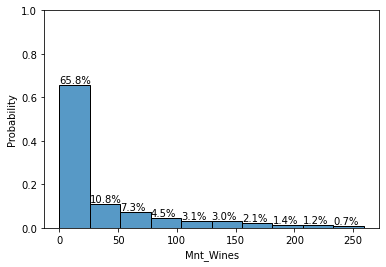

In [948]:
print(df["Mnt_Wines"].describe())

a_1 = sns.histplot(df['Mnt_Wines'], bins=10, stat="probability")
for r in a_1.patches:
    h_1 = r.get_height()
    x_2 = r.get_x()
    print(x_2, " ", h_1+1)
    a_1.annotate("{:.1f}%".format(h_1*100), xy=(x_2, h_1+0.008))
plt.ylim(0, 1)

# start of last bin
upper = df['Mnt_Wines'].max() - 1*((df['Mnt_Wines'].max()-df['Mnt_Wines'].min())/10)
display(df.loc[df['Mnt_Wines'] > upper])
df = df.drop(df.loc[df['Mnt_Wines'] > upper].index)

#### Mnt_Gold_Products

0.0   1.7267692307692308
26.3   1.1113846153846154
52.6   1.056
78.9   1.0387692307692307
105.2   1.024
131.5   1.0233846153846153
157.8   1.0116923076923077
184.1   1.0067692307692309
210.4   1.0
236.70000000000002   1.0012307692307691


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all
1631,4619,1945.0,4,Single,113734.00,0.0,0.0,2014-05-28,9,6.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,1,277.0
1649,5255,1986.0,2,Single,58207.75,1.0,0.0,2013-02-20,19,5.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,1,637.0


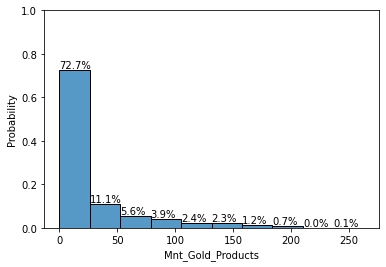

In [949]:
df["Mnt_Gold_Products"].describe()

a_1 = sns.histplot(df['Mnt_Gold_Products'], bins=10, stat="probability")
for r in a_1.patches:
    h_1 = r.get_height()
    x_2 = r.get_x()
    print(x_2, " ", h_1+1)
    a_1.annotate("{:.1f}%".format(h_1*100), xy=(x_2, h_1+0.008))
plt.ylim(0, 1)

# start of 9'th bin
upper = df['Mnt_Gold_Products'].max() - 2*((df['Mnt_Gold_Products'].max()-df['Mnt_Gold_Products'].min())/10)
display(df.loc[df['Mnt_Gold_Products'] > upper])
df = df.drop(df.loc[df['Mnt_Gold_Products'] > upper].index)

#### Mnt_Fish

0.0   1.6019716574245226
32.1   1.1829944547134936
64.2   1.0788662969808995
96.30000000000001   1.0462107208872458
128.4   1.03758471965496
160.5   1.0271102895871842
192.60000000000002   1.0141712877387554
224.70000000000002   1.009242144177449
256.8   1.0006161429451632
288.90000000000003   1.0012322858903266


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all
1626,10311,1969.0,2,Married,4428.0,0.0,1.0,2013-05-10,0,16.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,359.0
1630,6237,1966.0,4,Single,7144.0,0.0,2.0,2013-07-12,92,81.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,1,416.0
1640,4246,1982.0,3,Single,6560.0,0.0,0.0,2013-12-12,2,67.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,1,373.0


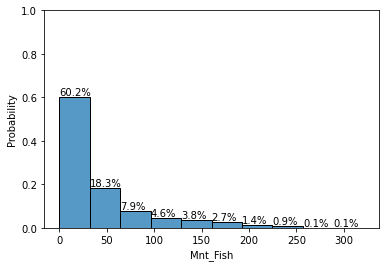

In [950]:
df["Mnt_Fish"].describe()

a_1 = sns.histplot(df['Mnt_Fish'], bins=10, stat="probability")
for r in a_1.patches:
    h_1 = r.get_height()
    x_2 = r.get_x()
    print(x_2, " ", h_1+1)
    a_1.annotate("{:.1f}%".format(h_1*100), xy=(x_2, h_1+0.008))
plt.ylim(0, 1)

# start of 9'th bin
upper = df['Mnt_Fish'].max() - 2*((df['Mnt_Fish'].max()-df['Mnt_Fish'].min())/10)
display(df.loc[df['Mnt_Fish'] > upper])
df = df.drop(df.loc[df['Mnt_Fish'] > upper].index)

#### Num_Web_Purchases

0.0   1.44320987654321
1.5   1.212962962962963
3.0   1.238888888888889
4.5   1.0401234567901234
6.0   1.0450617283950616
7.5   1.0067901234567902
9.0   1.0049382716049382
10.5   1.0030864197530864
12.0   1.002469135802469
13.5   1.002469135802469


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all
1,6862,1971.0,2,Divorced,1730.00,0.0,0.0,2014-05-18,65,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,3,8.0
2,10749,1991.0,2,Single,8028.00,0.0,0.0,2012-09-18,62,73.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,1,178.0
3,238,1967.0,1,Together,67309.00,1.0,1.0,2013-01-23,76,515.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,1082.0
6,9931,1963.0,4,Married,4023.00,1.0,1.0,2014-06-23,29,5.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,9.0
7,8148,1956.0,3,Together,50898.00,1.0,1.0,2013-08-01,88,285.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,859.0
8,3594,1973.0,3,Married,54108.00,1.0,1.0,2012-05-11,74,539.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,747.0
9,1513,1979.0,1,Together,60839.00,1.0,1.0,2012-08-28,72,600.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,1250.0
10,2408,1976.0,2,Married,60042.75,1.0,1.0,2012-11-20,20,490.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,733.0
11,1081,1957.0,4,Married,75283.00,1.0,2.0,2013-03-27,26,733.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,1019.0
12,4491,1949.0,3,Married,62845.00,1.0,1.0,2012-01-10,3,1099.0,...,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,1178.0


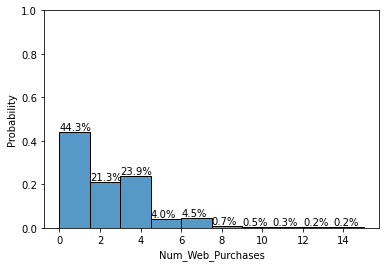

In [951]:
df["Num_Web_Purchases"].describe()

a_1 = sns.histplot(df['Num_Web_Purchases'], bins=10, stat="probability")
for r in a_1.patches:
    h_1 = r.get_height()
    x_2 = r.get_x()
    print(x_2, " ", h_1+1)
    a_1.annotate("{:.1f}%".format(h_1*100), xy=(x_2, h_1+0.008))
plt.ylim(0, 1)

# start of 8'th bin
upper = df['Num_Web_Purchases'].max() - 3*((df['Num_Web_Purchases'].max()-df['Num_Web_Purchases'].min())/10)
display(df.loc[df['Num_Web_Purchases'] > upper])
df = df.drop(df.loc[df['Num_Web_Purchases'] > upper].index)

#### Num_Store_Purchases

0.0   1.1829495955196017
1.1   1.165525824517735
2.2   1.1574362165525824
3.3000000000000003   1.1213441194772868
4.4   1.0989421281891725
5.5   1.0877411325451152
6.6000000000000005   1.0684505289359054
7.700000000000001   1.0460485376477908
8.8   1.028624766645924
9.9   1.0429371499688862


(0.0, 1.0)

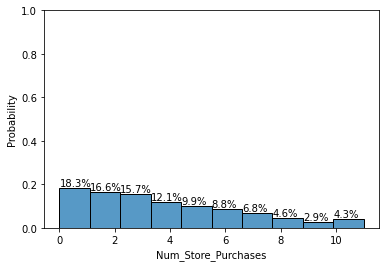

In [952]:
df["Num_Store_Purchases"].describe()

a_1 = sns.histplot(df['Num_Store_Purchases'], bins=10, stat="probability")
for r in a_1.patches:
    h_1 = r.get_height()
    x_2 = r.get_x()
    print(x_2, " ", h_1+1)
    a_1.annotate("{:.1f}%".format(h_1*100), xy=(x_2, h_1+0.008))
plt.ylim(0, 1)

#### Num_Deals_Purchases

0.0   1.5065339141257001
1.1   1.1213441194772868
2.2   1.075917859365277
3.3000000000000003   1.0790292470441818
4.4   1.0522713130056005
5.5   1.0553827006845053
6.6000000000000005   1.030491599253267
7.700000000000001   1.0255133789670192
8.8   1.0224019912881146
9.9   1.031113876789048


(0.0, 1.0)

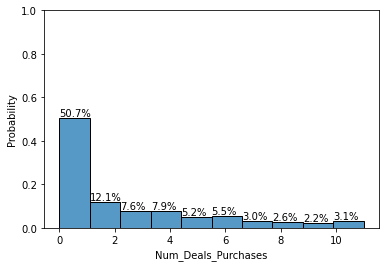

In [953]:
df["Num_Deals_Purchases"].describe()

a_1 = sns.histplot(df['Num_Deals_Purchases'], bins=10, stat="probability")
for r in a_1.patches:
    h_1 = r.get_height()
    x_2 = r.get_x()
    print(x_2, " ", h_1+1)
    a_1.annotate("{:.1f}%".format(h_1*100), xy=(x_2, h_1+0.008))
plt.ylim(0, 1)

seems to have no outliers

#### Num_Catalog_Purchases

count    1607.000000
mean        5.722464
std         3.196571
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: Num_Catalog_Purchases, dtype: float64
0.0   1.0043559427504667
1.3   1.1032980709396392
2.6   1.2296204107031736
3.9000000000000004   1.2395768512756689
5.2   1.0815183571873055
6.5   1.060360920970753
7.800000000000001   1.1101431238332296
9.1   1.0572495332918481
10.4   1.0373366521468574
11.700000000000001   1.0765401369010579


(0.0, 1.0)

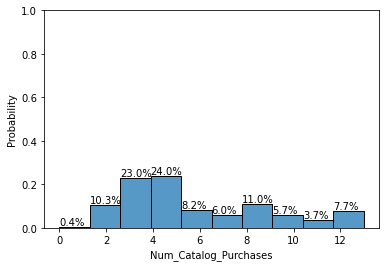

In [954]:
print(df["Num_Catalog_Purchases"].describe())

a_1 = sns.histplot(df['Num_Catalog_Purchases'], bins=10, stat="probability")
for r in a_1.patches:
    h_1 = r.get_height()
    x_2 = r.get_x()
    print(x_2, " ", h_1+1)
    a_1.annotate("{:.1f}%".format(h_1*100), xy=(x_2, h_1+0.008))
plt.ylim(0, 1)

#### Num_Web_Visits

0.0   1.0784069695084006
4.0   1.1705040448039825
8.0   1.223397635345364
12.0   1.3235843186060983
16.0   1.1997510889856877
20.0   1.0018668326073428
24.0   1.000622277535781
28.0   1.000622277535781
32.0   1.0
36.0   1.0012445550715618


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Status_cat,Mnt_all
1124,5899,1950.0,4,Widow,5648.0,1.0,1.0,2014-03-13,68,28.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,4,49.0
1623,4303,1957.0,4,Together,6835.0,0.0,1.0,2012-08-12,76,107.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,137.0


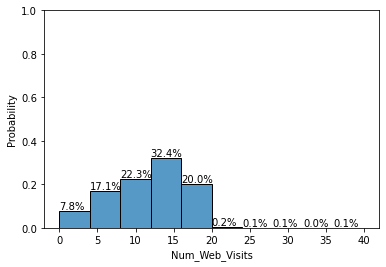

In [955]:
df["Num_Web_Visits"].describe()


a_1 = sns.histplot(df['Num_Web_Visits'], bins=10, stat="probability")
for r in a_1.patches:
    h_1 = r.get_height()
    x_2 = r.get_x()
    print(x_2, " ", h_1+1)
    a_1.annotate("{:.1f}%".format(h_1*100), xy=(x_2, h_1+0.008))
plt.ylim(0, 1)

# start of 7'th bin
upper = df['Num_Web_Visits'].max() - 3*((df['Num_Web_Visits'].max()-df['Num_Web_Visits'].min())/10)
display(df.loc[df['Num_Web_Visits'] > upper])
df = df.drop(df.loc[df['Num_Web_Visits'] > upper].index)

#### Response_Campaign_1

In [956]:
print(df["Response_Campaign_1"].value_counts())
# only 1 or 0 so not outliers

0.0    1484
1.0     121
Name: Response_Campaign_1, dtype: int64


#### Response_Campaign_2

In [957]:
print(df["Response_Campaign_2"].value_counts())
# only 1 or 0 so not outliers

0.0    1494
1.0     111
Name: Response_Campaign_2, dtype: int64


#### Response_Campaign_3

In [958]:
print(df["Response_Campaign_3"].value_counts())
# only 1 or 0 so not outliers

0.0    1497
1.0     108
Name: Response_Campaign_3, dtype: int64


#### Response_Campaign_4

In [959]:
print(df["Response_Campaign_4"].value_counts())
# only 1 or 0 so not outliers

0.0    1505
1.0     100
Name: Response_Campaign_4, dtype: int64


#### Response_Campaign_5

In [960]:
print(df["Response_Campaign_5"].value_counts())
# only 1 or 0 so not outliers

0.0    1585
1.0      20
Name: Response_Campaign_5, dtype: int64


#### Complain

In [961]:
print(df["Complain"].value_counts())
# only 1 or 0 so not outliers

0.0    1590
1.0      15
Name: Complain, dtype: int64


#### Response

In [962]:
print(df["Response"].value_counts())
# only 1 or 0 so not outliers

0    1370
1     235
Name: Response, dtype: int64


#### inconsistent data 

In [963]:
display(df["Num_Web_Purchases"].loc[(df['Num_Web_Visits'] < df["Num_Web_Purchases"])])

# num web visits can't be lower than num web purchases -> outliers (29)

df = df.drop(df["Num_Web_Purchases"].loc[(df['Num_Web_Visits'] < df["Num_Web_Purchases"])].index)
display(df["Num_Web_Purchases"].loc[(df['Num_Web_Visits'] < df["Num_Web_Purchases"])])


16      10.0
26       8.0
27       8.0
49       7.0
61       7.0
62       7.0
158      5.0
230      4.0
604      2.0
671      2.0
823      2.0
916      1.0
926      1.0
938      1.0
983      1.0
992      1.0
1082     1.0
1167     1.0
1214     1.0
1298     1.0
1300     1.0
1316     1.0
1355     1.0
1386     1.0
1457     1.0
1468     1.0
1526     1.0
1534     1.0
1539     1.0
Name: Num_Web_Purchases, dtype: float64

Series([], Name: Num_Web_Purchases, dtype: float64)

### Delete attributes

In [964]:
df = df.drop(["Cost_Contact", "Revenue","ID"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 17 to 1679
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year_Birth             1576 non-null   float64       
 1   Education              1576 non-null   int64         
 2   Status                 1576 non-null   object        
 3   Income                 1576 non-null   float64       
 4   Num_of_kids            1576 non-null   float64       
 5   Num_of_Teen            1576 non-null   float64       
 6   Registration_date      1576 non-null   datetime64[ns]
 7   Recency                1576 non-null   int64         
 8   Mnt_Fruits             1576 non-null   float64       
 9   Mnt_Meat               1576 non-null   float64       
 10  Mnt_sweet              1576 non-null   float64       
 11  Mnt_Wines              1576 non-null   float64       
 12  Mnt_Gold_Products      1576 non-null   float64       
 13  Mn

* Split to target and data  


In [965]:
target = pd.DataFrame(df['Response']) 
data = df.drop(['Response'], axis=1)

how many values each attribute can get? 

In [966]:
for col in df.columns:
    print(col, len(df[col].unique()))

Year_Birth 51
Education 5
Status 5
Income 1444
Num_of_kids 3
Num_of_Teen 3
Registration_date 616
Recency 100
Mnt_Fruits 641
Mnt_Meat 140
Mnt_sweet 469
Mnt_Wines 159
Mnt_Gold_Products 163
Mnt_Fish 196
Num_Web_Purchases 11
Num_Store_Purchases 12
Num_Deals_Purchases 12
Num_Catalog_Purchases 14
Num_Web_Visits 17
Response_Campaign_1 2
Response_Campaign_2 2
Response_Campaign_3 2
Response_Campaign_4 2
Response_Campaign_5 2
Complain 2
Response 2
Status_cat 5
Mnt_all 830


### Data Statistics
---
* On this section we will show the statistics of the data (distribution, skewness, median and more.)

In [967]:
numeric_col = data.describe(datetime_is_numeric=True).columns
numeric_col

Index(['Year_Birth', 'Education', 'Income', 'Num_of_kids', 'Num_of_Teen',
       'Registration_date', 'Recency', 'Mnt_Fruits', 'Mnt_Meat', 'Mnt_sweet',
       'Mnt_Wines', 'Mnt_Gold_Products', 'Mnt_Fish', 'Num_Web_Purchases',
       'Num_Store_Purchases', 'Num_Deals_Purchases', 'Num_Catalog_Purchases',
       'Num_Web_Visits', 'Response_Campaign_1', 'Response_Campaign_2',
       'Response_Campaign_3', 'Response_Campaign_4', 'Response_Campaign_5',
       'Complain', 'Status_cat', 'Mnt_all'],
      dtype='object')

In [968]:
numeric_data = df[numeric_col]
nominal_data = data.drop(numeric_col, axis=1)
nominal_col = nominal_data.columns
nominal_col

Index(['Status'], dtype='object')

* note that Registration_date considered as numeric attribute 

### Numerical data
---
* On this sub-section we will handle the numerical data (skewness, mode, etc...)


C:\Users\Tomer\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


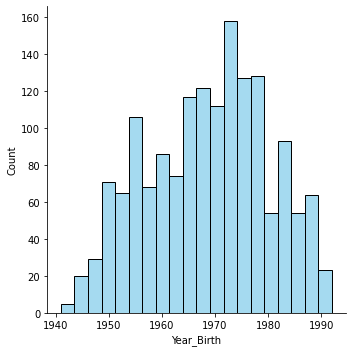

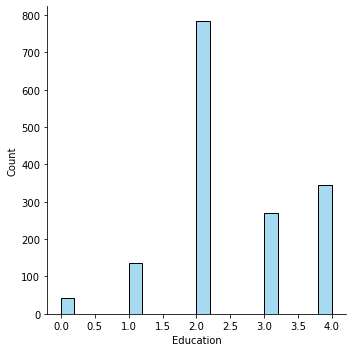

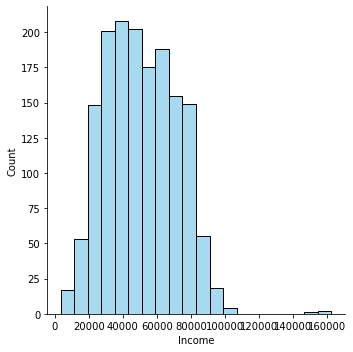

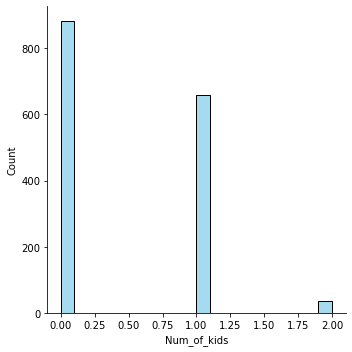

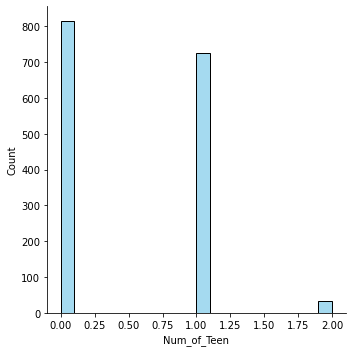

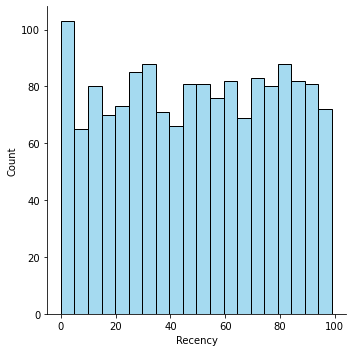

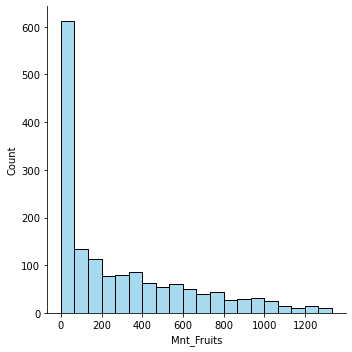

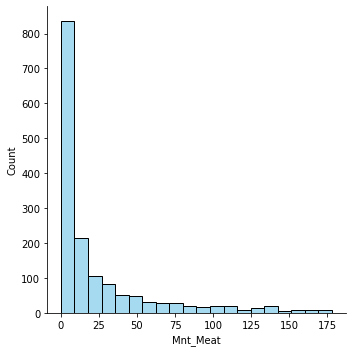

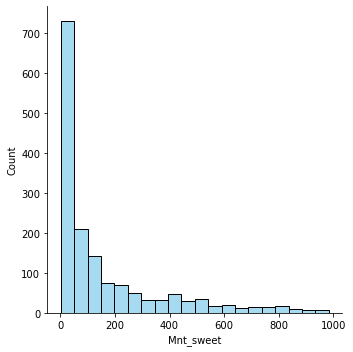

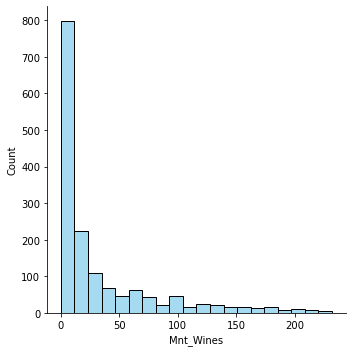

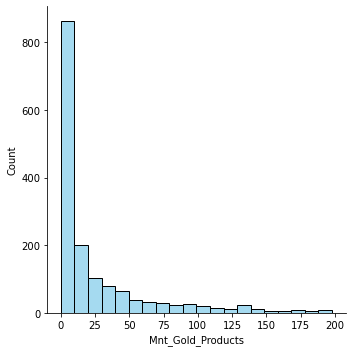

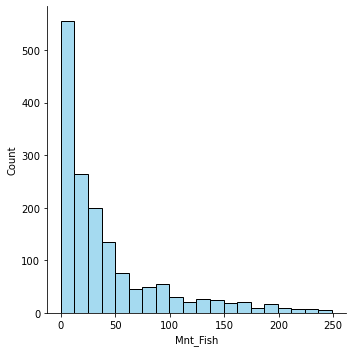

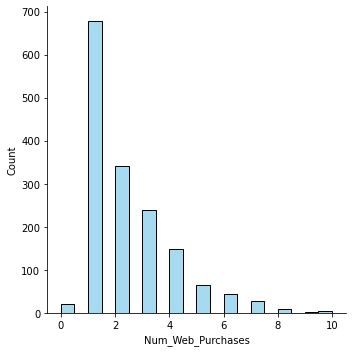

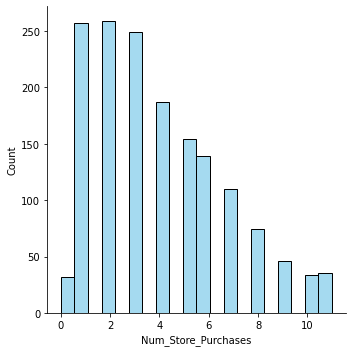

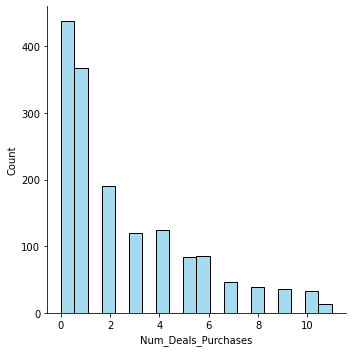

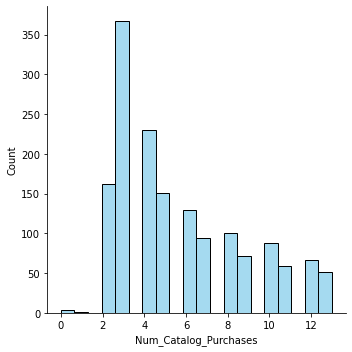

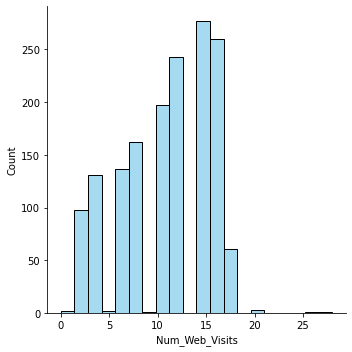

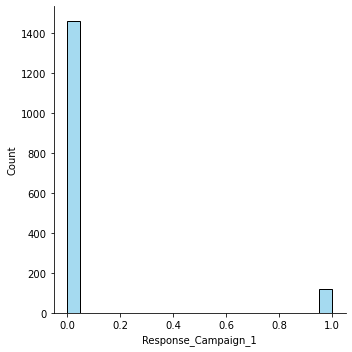

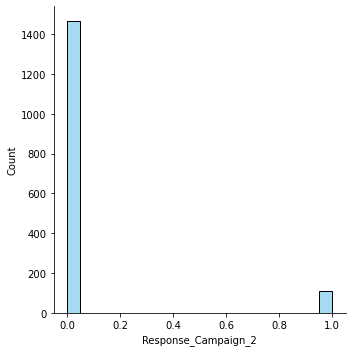

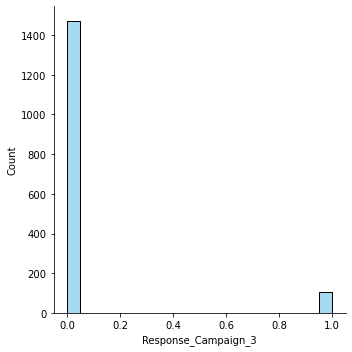

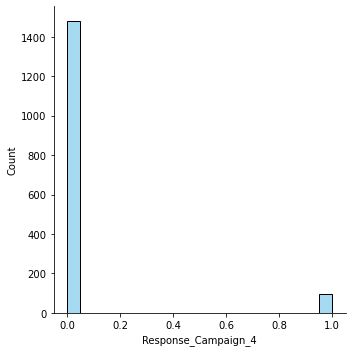

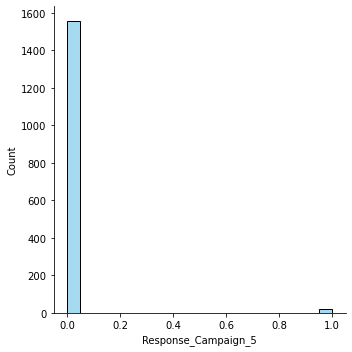

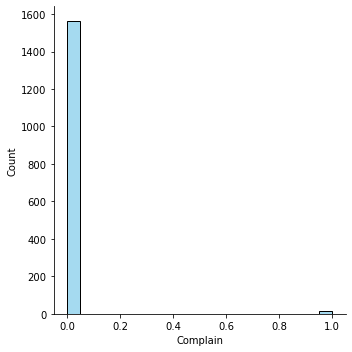

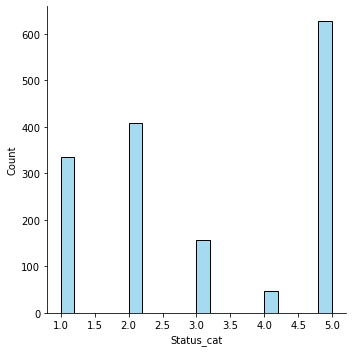

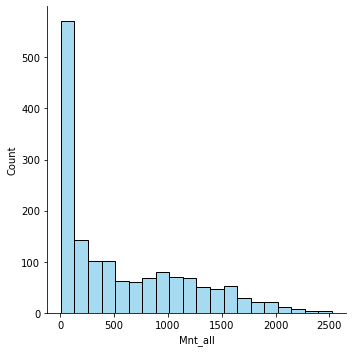

In [969]:
cols = [c for c in numeric_col if c!='Registration_date']  # plot Registration_date attribute seperately 
for column in cols:  # Plot count of saamples vs. each attribute 
        sns.displot(numeric_data[column], bins=20, color='skyblue')  

* From the histograms above it looks like 'Year_Birth', 'Income' normal distributed, 'Recency', 'ID' uniform distributed, 'Mnt_Fruits', 'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products', 'Mnt_Fish' exponential distributed. whereas the other attributes are not.

* Moreover, we can see that 'Response_Campaign_1-5', 'Complain', etc... has only two values i.e. it's a binary attribute.

* Registration_date attribute 

([<matplotlib.axis.XTick at 0x1c1a71dc910>,
 [Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09'),
  Text(15706.0, 0, '2013-01')])

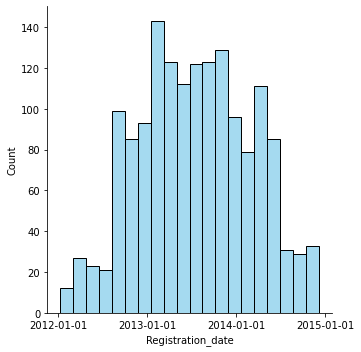

In [970]:
sns.displot(numeric_data['Registration_date'], bins=20, color='skyblue')  # plot Registration_date attribute 
plt.xticks(['2012','2013','2014','2015'])  # set the xticks 

* Graph (histogram) of registrations and dates

Text(0, 0.5, 'Registrations')

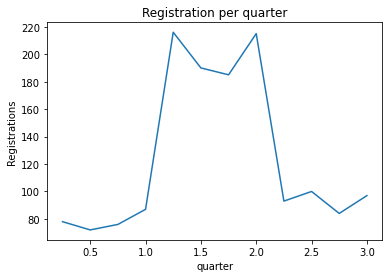

In [971]:
a_1 = df.groupby(df["Registration_date"].dt.year)  # get the years 

b_1 = df[df.index.isin(a_1.indices[2012])]  # 2012 year
b_2 = df[df.index.isin(a_1.indices[2013])]  # 2013 year
b_3 = df[df.index.isin(a_1.indices[2014])]  # 2014 year

r_2 = b_2["Registration_date"].groupby(b_2["Registration_date"].dt.quarter).size()
r_3 = b_3["Registration_date"].groupby(b_3["Registration_date"].dt.quarter).size()
r_1 = b_1["Registration_date"].groupby(b_1["Registration_date"].dt.quarter).size()

y_data = [r_1[1], r_1[2], r_1[3], r_1[4], r_2[1], r_2[2], r_2[3], r_2[4], r_3[1], r_3[2], r_3[3], r_3[4]]
x_data = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]  # 3 years , 4 quarters each 
plt.plot(x_data, y_data)
plt.title("Registration per quarter")
plt.xlabel("quarter")
plt.ylabel("Registrations")

From the graphs we can infer the distributions:

- Normal 

Year_Birth, Income, Registration_date

- Exponential 

Mnt_Fruits, Mnt_Meat, Mnt_sweet, Mnt_Wines, Mnt_Gold_Products, Mnt_Fish 

- Uniform 

ID, Recency

- Other 

Num_Web_Purchases, Num_Store_Purchases, Num_Deals_Purchases, Num_Catalog_Purchases, Num_Web_Visits, Cost_Contact, Revenue 
Response_Campaign_1-5, Complain, Num_of_kids, Num_of_Teen

* Relation of Mnt_Fruits distribution to exponential distribution 

Text(0.5, 1.0, 'Mnt_Fruits density Vs exponential dist.')

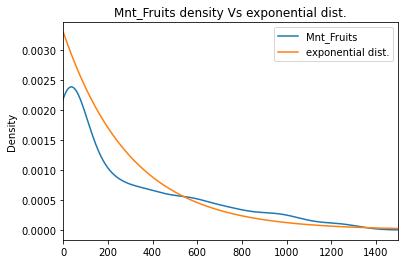

In [972]:
x_1 = np.arange(0,1500)
l = 0.0033  # compute lamda coeff, 1/mean(Mnt_Fruits)
y_1 = l*np.exp(-l*x_1)
df["Mnt_Fruits"].plot.kde()
plt.plot(x_1, y_1, label="exponential dist.")
plt.xlim((0, 1500))
plt.legend()
plt.title("Mnt_Fruits density Vs exponential dist.")

In [973]:
normal = ['Year_Birth', 'Income']

exponenital = ['Mnt_Fruits', 'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products', 'Mnt_Fish']

uniform = ['Recency']

other = [item for item in numeric_col if item not in normal+exponenital+uniform+['Registration_date']]
other

['Education',
 'Num_of_kids',
 'Num_of_Teen',
 'Num_Web_Purchases',
 'Num_Store_Purchases',
 'Num_Deals_Purchases',
 'Num_Catalog_Purchases',
 'Num_Web_Visits',
 'Response_Campaign_1',
 'Response_Campaign_2',
 'Response_Campaign_3',
 'Response_Campaign_4',
 'Response_Campaign_5',
 'Complain',
 'Status_cat',
 'Mnt_all']

#### Skewness

In [974]:
print('skewness of normal distributed attributes')
for col in normal:
    print(col, ' skewness:', numeric_data[col].skew(axis = 0, skipna = True))
    
print('\nskewness of exponenital distributed attributes')
for col in exponenital:
    print(col, ' skewness:', numeric_data[col].skew(axis = 0, skipna = True))    
    
print('\nskewness of uniform distributed attributes')
for col in uniform:
    print(col, ' skewness:', numeric_data[col].skew(axis = 0, skipna = True))

print('\nskewness of other attributes')
for col in other:
    print(col, ' skewness:', numeric_data[col].skew(axis = 0, skipna = True))

skewness of normal distributed attributes
Year_Birth  skewness: -0.14341544773555276
Income  skewness: 0.3426785388918412

skewness of exponenital distributed attributes
Mnt_Fruits  skewness: 1.1364793080835514
Mnt_Meat  skewness: 2.105289833964688
Mnt_sweet  skewness: 1.7939272970674254
Mnt_Wines  skewness: 1.9402981822676995
Mnt_Gold_Products  skewness: 2.198778955339283
Mnt_Fish  skewness: 1.8329410817827518

skewness of uniform distributed attributes
Recency  skewness: -0.02609451068330779

skewness of other attributes
Education  skewness: 0.08459618845092534
Num_of_kids  skewness: 0.569392202860809
Num_of_Teen  skewness: 0.3905679331707179
Num_Web_Purchases  skewness: 1.5065925478281903
Num_Store_Purchases  skewness: 0.7245481691822006
Num_Deals_Purchases  skewness: 1.1931805774426754
Num_Catalog_Purchases  skewness: 0.7682892832829913
Num_Web_Visits  skewness: -0.32467743246339903
Response_Campaign_1  skewness: 3.2512143013151307
Response_Campaign_2  skewness: 3.379948005005927
R

#### Mode

In [975]:
m_1 = df.mode()
m_2 = m_1.iloc[0, :]
print(m_2)

Year_Birth                            1976.0
Education                                  2
Status                               Married
Income                                7500.0
Num_of_kids                              0.0
Num_of_Teen                              0.0
Registration_date        2013-02-14 00:00:00
Recency                                   56
Mnt_Fruits                               2.0
Mnt_Meat                                 0.0
Mnt_sweet                                7.0
Mnt_Wines                                0.0
Mnt_Gold_Products                        0.0
Mnt_Fish                                 4.0
Num_Web_Purchases                        1.0
Num_Store_Purchases                      2.0
Num_Deals_Purchases                      0.0
Num_Catalog_Purchases                    3.0
Num_Web_Visits                          14.0
Response_Campaign_1                      0.0
Response_Campaign_2                      0.0
Response_Campaign_3                      0.0
Response_C

let's look at the probability

In [976]:
cols = [c for c in numeric_col if c!='Registration_date']  # plot Registration_date attribute seperately
cols

['Year_Birth',
 'Education',
 'Income',
 'Num_of_kids',
 'Num_of_Teen',
 'Recency',
 'Mnt_Fruits',
 'Mnt_Meat',
 'Mnt_sweet',
 'Mnt_Wines',
 'Mnt_Gold_Products',
 'Mnt_Fish',
 'Num_Web_Purchases',
 'Num_Store_Purchases',
 'Num_Deals_Purchases',
 'Num_Catalog_Purchases',
 'Num_Web_Visits',
 'Response_Campaign_1',
 'Response_Campaign_2',
 'Response_Campaign_3',
 'Response_Campaign_4',
 'Response_Campaign_5',
 'Complain',
 'Status_cat',
 'Mnt_all']

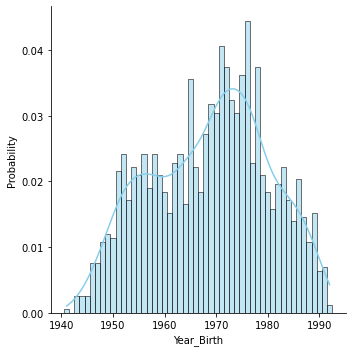

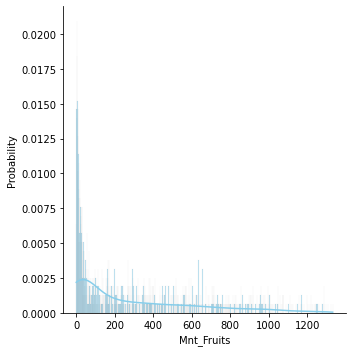

In [977]:
for col in ['Year_Birth', 'Mnt_Fruits']:
    sns.displot(numeric_data[col], kde=True, color='skyblue', stat="probability", discrete=True )

([<matplotlib.axis.XTick at 0x1c1b5c5e2b0>,
 [Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09'),
  Text(15706.0, 0, '2013-01')])

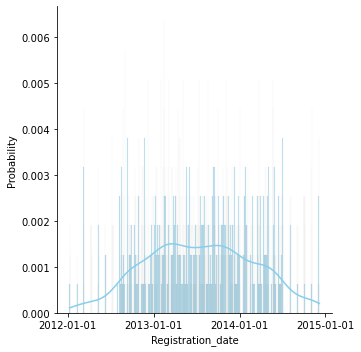

In [978]:
sns.displot(numeric_data['Registration_date'], kde=True, color='skyblue', stat="probability", discrete=True )
plt.xticks(['2012','2013','2014','2015'])  # set the xticks 

#### Statistic information
Describe function show statistic information for numerical data.

In [979]:
numeric_data.describe()

,Year_Birth,Education,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Status_cat,Mnt_all
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,...,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,1968.737944,2.467005,50845.754573,0.462563,0.504442,49.394670,293.135152,23.918782,157.046382,33.750635,...,5.701142,10.781091,0.074239,0.069797,0.066624,0.060914,0.012056,0.008249,3.141497,575.074301
std,11.428863,1.009883,20683.501108,0.541480,0.541584,29.122298,329.337438,36.565815,211.739178,49.130594,...,3.180719,4.555372,0.262242,0.254885,0.249449,0.239248,0.109170,0.090476,1.648365,588.617734
min,1941.000000,0.000000,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
25%,1959.000000,2.000000,34342.500000,0.000000,0.000000,25.000000,23.000000,1.000000,15.000000,2.000000,...,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,64.000000
50%,1970.000000,2.000000,49499.500000,0.000000,0.000000,50.000000,159.500000,7.000000,60.500000,11.000000,...,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,332.500000
75%,1977.000000,3.000000,66485.750000,1.000000,1.000000,75.000000,495.250000,28.000000,215.000000,43.000000,...,8.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1001.750000
max,1992.000000,4.000000,162397.000000,2.000000,2.000000,99.000000,1332.000000,178.000000,984.000000,232.000000,...,13.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2525.000000


#### Boxplot graph 

<AxesSubplot:ylabel='Income'>

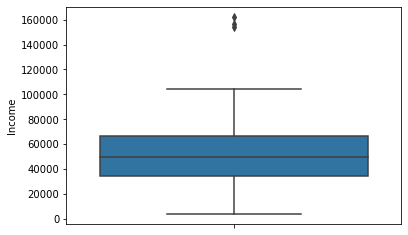

In [980]:
sns.boxplot(y="Income", data=df)

<AxesSubplot:ylabel='Year_Birth'>

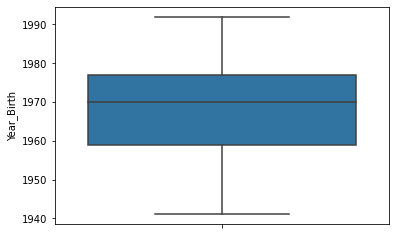

In [981]:
sns.boxplot(y="Year_Birth", data=df)

<AxesSubplot:ylabel='Mnt_Fruits'>

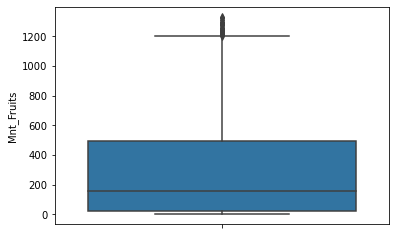

In [982]:
sns.boxplot(y="Mnt_Fruits", data=df)

<AxesSubplot:>

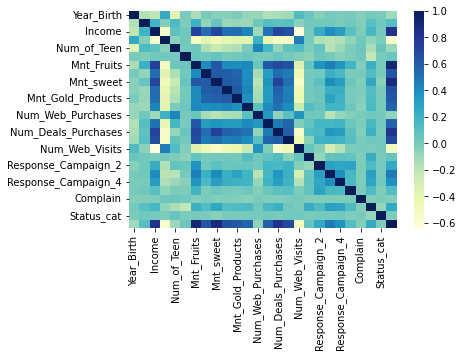

In [983]:
corr = df.corr(method='pearson')
sns.heatmap(corr, cmap="YlGnBu")

In [984]:
corr = df.corr(method='pearson')
corr

,Year_Birth,Education,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Status_cat,Mnt_all
Year_Birth,1.000000,-0.165809,-0.212106,0.250032,-0.377655,-0.012562,-0.151400,-0.001531,-0.050910,-0.046519,...,0.132351,0.045686,-0.046245,-0.002780,-0.019701,-0.006117,-0.041504,0.000241,-0.015724,-0.115808
Education,-0.165809,1.000000,0.186411,-0.038835,0.140153,-0.020174,0.206384,-0.079216,0.052789,-0.097043,...,-0.059468,0.012851,0.021286,0.020073,-0.007443,0.018008,-0.035238,0.101508,0.024356,0.106280
Income,-0.212106,0.186411,1.000000,-0.528037,0.077463,0.024619,0.726088,0.526791,0.703606,0.527875,...,-0.641851,-0.002666,0.236706,0.396097,0.324913,0.101285,-0.019589,0.160783,0.008466,0.808544
Num_of_kids,0.250032,-0.038835,-0.528037,1.000000,-0.053559,0.021754,-0.513664,-0.374859,-0.451425,-0.399622,...,0.460901,0.003935,-0.165070,-0.195400,-0.158824,-0.072916,0.025747,-0.072424,-0.015758,-0.564035
Num_of_Teen,-0.377655,0.140153,0.077463,-0.053559,1.000000,0.009228,0.038080,-0.160768,-0.247809,-0.184541,...,0.124825,-0.022440,0.062145,-0.183131,-0.104992,-0.017014,0.031646,-0.154170,0.056548,-0.104756
Recency,-0.012562,-0.020174,0.024619,0.021754,0.009228,1.000000,0.032690,0.016860,0.052097,0.001208,...,-0.038498,-0.059208,0.036232,0.003283,-0.051203,-0.013680,0.016354,-0.215446,-0.011004,0.042406
Mnt_Fruits,-0.151400,0.206384,0.726088,-0.513664,0.038080,0.032690,1.000000,0.398189,0.621948,0.408574,...,-0.340862,0.068047,0.369026,0.459373,0.361348,0.184760,-0.032682,0.214914,-0.005847,0.904495
Mnt_Meat,-0.001531,-0.079216,0.526791,-0.374859,-0.160768,0.016860,0.398189,1.000000,0.608253,0.584106,...,-0.440581,0.001093,0.022476,0.214222,0.152977,-0.013274,-0.002676,0.121900,-0.011196,0.623682
Mnt_sweet,-0.050910,0.052789,0.703606,-0.451425,-0.247809,0.052097,0.621948,0.608253,1.000000,0.607575,...,-0.556926,0.024778,0.094319,0.408307,0.310106,0.034129,-0.026401,0.258256,-0.049421,0.869908
Mnt_Wines,-0.046519,-0.097043,0.527875,-0.399622,-0.184541,0.001208,0.408574,0.584106,0.607575,1.000000,...,-0.455308,0.013758,0.032167,0.216975,0.229563,0.002573,-0.020819,0.117786,-0.013292,0.644246


Response               1.000000
Response_Campaign_3    0.306547
Response_Campaign_4    0.277006
Mnt_sweet              0.258256
Mnt_all                0.251702
Name: Response, dtype: float64
Recency       -0.215446
Num_of_Teen   -0.154170
Status_cat    -0.090022
Num_of_kids   -0.072424
Complain      -0.037795
Name: Response, dtype: float64


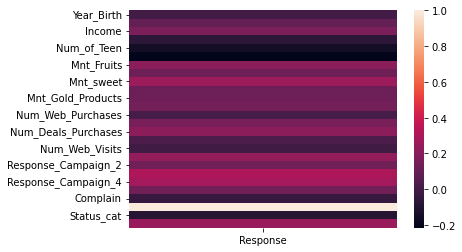

In [985]:
sns.heatmap(corr[["Response"]])
print(corr["Response"].nlargest(5))
print(corr["Response"].nsmallest(5))

In [986]:
corr_res = np.array(corr["Response"])
print(len(corr_res))
print(corr_res)

26
[ 2.41016811e-04  1.01508373e-01  1.60782787e-01 -7.24239899e-02
 -1.54170208e-01 -2.15445506e-01  2.14913687e-01  1.21900453e-01
  2.58256055e-01  1.17786358e-01  1.30880518e-01  1.45030193e-01
  1.23360151e-02  1.57377318e-01  2.16426214e-01  2.76669857e-02
 -7.65537969e-03  2.31653344e-01  1.39950509e-01  3.06547163e-01
  2.77006129e-01  1.35045746e-01 -3.77952337e-02  1.00000000e+00
 -9.00220142e-02  2.51702078e-01]


Text(0.5, 1.0, 'correlation with Response')

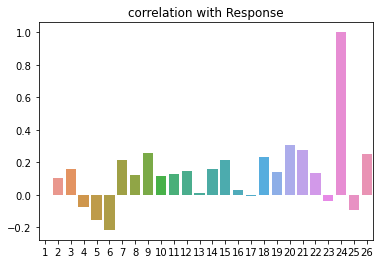

In [987]:
sns.barplot(x=np.arange(1, len(corr_res)+1),y=corr_res)
plt.title("correlation with Response")

### Nominal data
---
* On this section we will deal with the categorial attributes 

In [988]:
nominal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 17 to 1679
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Status  1576 non-null   object
dtypes: object(1)
memory usage: 24.6+ KB


In [989]:
df_describe_nom = nominal_data.describe()
df_describe_nom

,Status
count,1576
unique,5
top,Married
freq,628


In [990]:
df_describe_nom.loc['%freq'] = df_describe_nom.apply(lambda x: np.round(x.loc['freq']/len(df), decimals=3))
df_describe_nom

,Status
count,1576
unique,5
top,Married
freq,628
%freq,0.398


In [991]:
nominal_data['Status'].value_counts()

Married     628
Together    408
Single      336
Divorced    157
Widow        47
Name: Status, dtype: int64

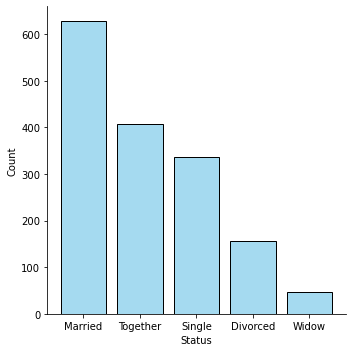

In [992]:
for col in nominal_col:
    sns.displot(nominal_data, x=col, shrink=0.8, color='skyblue')

### Target 

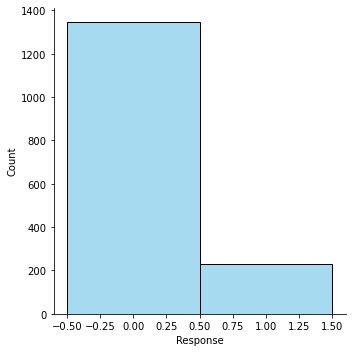

In [993]:
sns.displot(target, x='Response', bins=2, color='skyblue', discrete=True)

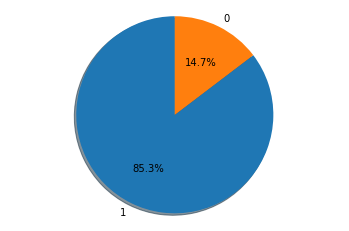

In [994]:
fig1, ax1 = plt.subplots()
ax1.pie(target['Response'].value_counts(), labels=target['Response'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Exploring the behavior of the attributes according to the target values

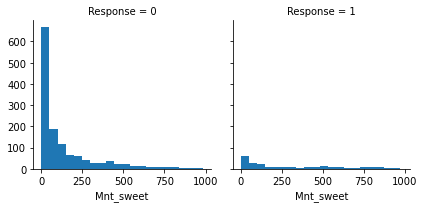

In [995]:
g = sns.FacetGrid(df, col='Response')
g.map(plt.hist, 'Mnt_sweet', bins=20)

#### Scatter plot

Text(0, 0.5, 'Mnt_sweet')

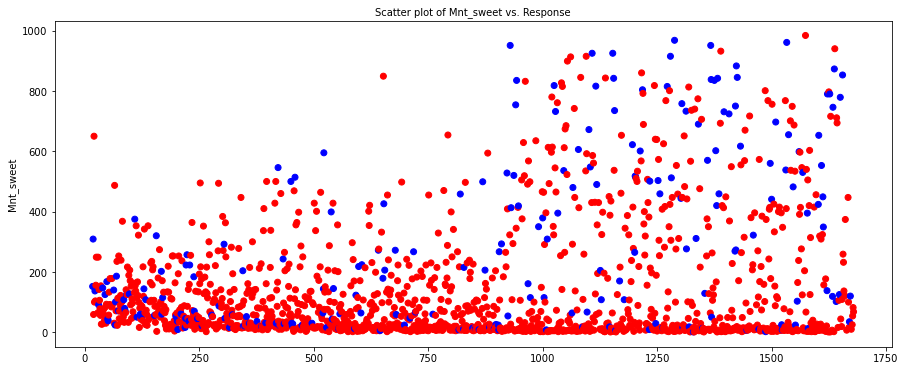

In [996]:
colordict = {0: 'red', 1: 'blue'}

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df['Mnt_sweet'], c = df['Response'].map(colordict))

plt.title('Scatter plot of Mnt_sweet vs. Response', fontdict={'fontsize':10})
plt.ylabel('Mnt_sweet', fontsize=10)


In [997]:
df.describe(datetime_is_numeric=True)

,Year_Birth,Education,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Status_cat,Mnt_all
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576,1576.000000,1576.000000,1576.000000,1576.000000,...,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,1968.737944,2.467005,50845.754573,0.462563,0.504442,2013-07-16 11:09:44.771573504,49.394670,293.135152,23.918782,157.046382,...,10.781091,0.074239,0.069797,0.066624,0.060914,0.012056,0.008249,0.146574,3.141497,575.074301
min,1941.000000,0.000000,3502.000000,0.000000,0.000000,2012-01-09 00:00:00,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
25%,1959.000000,2.000000,34342.500000,0.000000,0.000000,2013-02-01 00:00:00,25.000000,23.000000,1.000000,15.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,64.000000
50%,1970.000000,2.000000,49499.500000,0.000000,0.000000,2013-07-13 00:00:00,50.000000,159.500000,7.000000,60.500000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,332.500000
75%,1977.000000,3.000000,66485.750000,1.000000,1.000000,2014-01-01 00:00:00,75.000000,495.250000,28.000000,215.000000,...,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1001.750000
max,1992.000000,4.000000,162397.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1332.000000,178.000000,984.000000,...,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2525.000000
std,11.428863,1.009883,20683.501108,0.541480,0.541584,NaN,29.122298,329.337438,36.565815,211.739178,...,4.555372,0.262242,0.254885,0.249449,0.239248,0.109170,0.090476,0.353793,1.648365,588.617734


* Relation of Mnt_Fruits distribution to exponential distribution 

Text(0.5, 1.0, 'Mnt_Fruits density Vs exponential dist.')

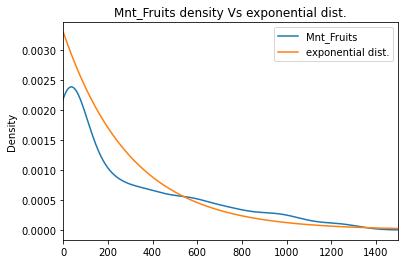

In [998]:
x_1 = np.arange(0,1500)
l = 0.0033
y_1 = l*np.exp(-l*x_1)
# sns.lineplot(df["Mnt_Fruits"])
df["Mnt_Fruits"].plot.kde()
# df[df["Mnt_Fruits"]].shape
plt.plot(x_1, y_1, label="exponential dist.")
plt.xlim((0, 1500))
plt.legend()
plt.title("Mnt_Fruits density Vs exponential dist.")

### Normalization

In [999]:
df_dis = df.copy()

In [1000]:
numeric_col = df.describe(datetime_is_numeric=True).columns
numeric_col
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 17 to 1679
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year_Birth             1576 non-null   float64       
 1   Education              1576 non-null   int64         
 2   Status                 1576 non-null   object        
 3   Income                 1576 non-null   float64       
 4   Num_of_kids            1576 non-null   float64       
 5   Num_of_Teen            1576 non-null   float64       
 6   Registration_date      1576 non-null   datetime64[ns]
 7   Recency                1576 non-null   int64         
 8   Mnt_Fruits             1576 non-null   float64       
 9   Mnt_Meat               1576 non-null   float64       
 10  Mnt_sweet              1576 non-null   float64       
 11  Mnt_Wines              1576 non-null   float64       
 12  Mnt_Gold_Products      1576 non-null   float64       
 13  Mn

In [1001]:
numeric_data = df[numeric_col]
scaler = MinMaxScaler()
    
for i in numeric_data:
    scaler.fit(pd.DataFrame(df[i]))
    df[i] = scaler.transform(pd.DataFrame(df[i]))
df.describe()

,Year_Birth,Education,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Status_cat,Mnt_all
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,...,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,0.543881,0.616751,0.297956,0.231282,0.252221,0.522095,0.498936,0.220071,0.134375,0.158745,...,0.385039,0.074239,0.069797,0.066624,0.060914,0.012056,0.008249,0.146574,0.535374,0.226220
std,0.224095,0.252471,0.130171,0.270740,0.270792,0.216982,0.294165,0.247250,0.205426,0.215401,...,0.162692,0.262242,0.254885,0.249449,0.239248,0.109170,0.090476,0.353793,0.412091,0.233578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352941,0.500000,0.194094,0.000000,0.000000,0.366290,0.252525,0.017267,0.005618,0.014242,...,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.023413
50%,0.568627,0.500000,0.289484,0.000000,0.000000,0.518832,0.505051,0.119745,0.039326,0.060529,...,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.129960
75%,0.705882,0.750000,0.396386,0.500000,0.500000,0.680791,0.757576,0.371809,0.157303,0.217701,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.395536
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### PCA

In [1002]:
numeric_col = df.describe(datetime_is_numeric=True).columns
numeric_data = df[numeric_col]
numeric_data.info()     # use only numeric data for PCA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 17 to 1679
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             1576 non-null   float64
 1   Education              1576 non-null   float64
 2   Income                 1576 non-null   float64
 3   Num_of_kids            1576 non-null   float64
 4   Num_of_Teen            1576 non-null   float64
 5   Registration_date      1576 non-null   float64
 6   Recency                1576 non-null   float64
 7   Mnt_Fruits             1576 non-null   float64
 8   Mnt_Meat               1576 non-null   float64
 9   Mnt_sweet              1576 non-null   float64
 10  Mnt_Wines              1576 non-null   float64
 11  Mnt_Gold_Products      1576 non-null   float64
 12  Mnt_Fish               1576 non-null   float64
 13  Num_Web_Purchases      1576 non-null   float64
 14  Num_Store_Purchases    1576 non-null   float64
 15  Num

In [1003]:
pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(numeric_data, y='Response')
df2 = pd.DataFrame(pca.transform(numeric_data))

In [1004]:
pca.explained_variance_ratio_

array([0.25811837, 0.11422636, 0.0936861 , 0.07544243, 0.05730965,
       0.05126686, 0.04532909, 0.03995525, 0.03570137, 0.02963367,
       0.02449115, 0.02360397, 0.02096764, 0.0192928 , 0.01615804,
       0.0160025 , 0.01363125, 0.01195294, 0.01041737, 0.00937963,
       0.00775372, 0.00718528, 0.0063272 , 0.00523339, 0.00500879,
       0.00192519])

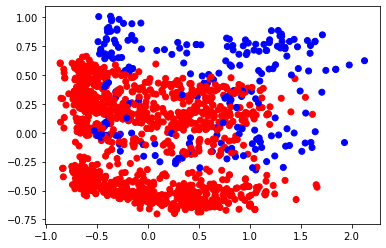

In [1005]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(df2[0], df2[1], c = df["Response"].map(colordict))

### Discretization

3502.0
19391.5
35281.0
51170.5
67060.0
82949.5
98839.0
114728.5
130618.0
146507.5


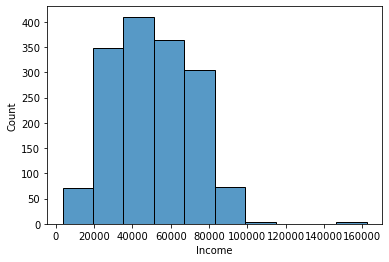

In [1006]:
ax = sns.histplot(df_dis["Income"], bins=10)

# print the bins ranges
for i in ax.patches:
    print(i.get_x())

In [1007]:
df_dis.loc[ df_dis['Income'] <= 25000, 'Income_bin'] = 0
df_dis.loc[(df_dis['Income'] > 25000) & (df_dis['Income'] <= 35281.0), 'Income_bin'] = 1
df_dis.loc[(df_dis['Income'] > 35281.0) & (df_dis['Income'] <= 51170), 'Income_bin'] = 2
df_dis.loc[(df_dis['Income'] > 51170) & (df_dis['Income'] <= 82949), 'Income_bin'] = 3
df_dis.loc[ df_dis['Income'] > 82949, 'Income_bin'] = 4

In [1008]:
print(df_dis["Income_bin"].value_counts())

3.0    667
2.0    410
1.0    250
0.0    169
4.0     80
Name: Income_bin, dtype: int64


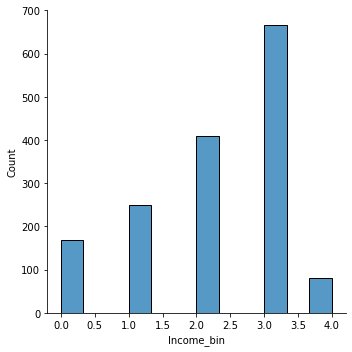

In [1009]:
sns.displot(df_dis["Income_bin"])

min Year_Birth:  1941.0
max Year_Birth:  1992.0


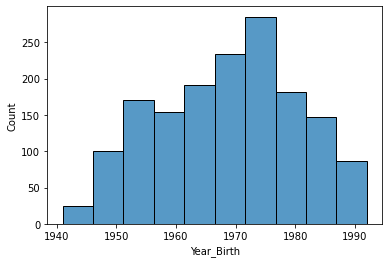

In [1010]:
ax = sns.histplot(df_dis["Year_Birth"], bins=10)
print("min Year_Birth: ", df_dis["Year_Birth"].min())
print("max Year_Birth: ", df_dis["Year_Birth"].max())


In [1011]:
df_dis.loc[ df_dis['Year_Birth'] <= 1950, 'Year_Birth_bin'] = 0
df_dis.loc[(df_dis['Year_Birth'] > 1950) & (df_dis['Year_Birth'] <= 1960), 'Year_Birth_bin'] = 1
df_dis.loc[(df_dis['Year_Birth'] > 1960) & (df_dis['Year_Birth'] <= 1970), 'Year_Birth_bin'] = 2
df_dis.loc[(df_dis['Year_Birth'] > 1970) & (df_dis['Year_Birth'] <= 1980), 'Year_Birth_bin'] = 3
df_dis.loc[ df_dis['Year_Birth'] > 1980, 'Year_Birth_bin'] = 4

In [1012]:
print(df_dis["Year_Birth_bin"].value_counts())

3.0    506
2.0    385
1.0    335
4.0    259
0.0     91
Name: Year_Birth_bin, dtype: int64


In [1013]:
df_dis.describe()

,Year_Birth,Education,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response,Status_cat,Mnt_all,Income_bin,Year_Birth_bin
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,...,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.00000,1576.000000
mean,1968.737944,2.467005,50845.754573,0.462563,0.504442,49.394670,293.135152,23.918782,157.046382,33.750635,...,0.069797,0.066624,0.060914,0.012056,0.008249,0.146574,3.141497,575.074301,2.15165,2.321701
std,11.428863,1.009883,20683.501108,0.541480,0.541584,29.122298,329.337438,36.565815,211.739178,49.130594,...,0.254885,0.249449,0.239248,0.109170,0.090476,0.353793,1.648365,588.617734,1.09160,1.148608
min,1941.000000,0.000000,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.00000,0.000000
25%,1959.000000,2.000000,34342.500000,0.000000,0.000000,25.000000,23.000000,1.000000,15.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,64.000000,1.00000,1.000000
50%,1970.000000,2.000000,49499.500000,0.000000,0.000000,50.000000,159.500000,7.000000,60.500000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,332.500000,2.00000,2.000000
75%,1977.000000,3.000000,66485.750000,1.000000,1.000000,75.000000,495.250000,28.000000,215.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1001.750000,3.00000,3.000000
max,1992.000000,4.000000,162397.000000,2.000000,2.000000,99.000000,1332.000000,178.000000,984.000000,232.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2525.000000,4.00000,4.000000


min Mnt_Fruits:  0.0
max Mnt_Fruits:  1332.0
0.0
133.2
266.4
399.59999999999997
532.8
666.0
799.1999999999999
932.3999999999999
1065.6
1198.8


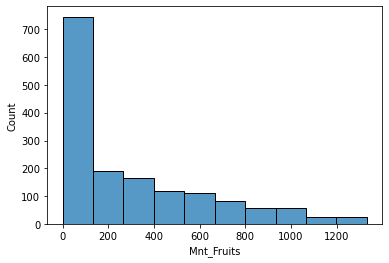

In [1014]:
ax = sns.histplot(df_dis["Mnt_Fruits"], bins=10)
print("min Mnt_Fruits: ", df_dis["Mnt_Fruits"].min())
print("max Mnt_Fruits: ", df_dis["Mnt_Fruits"].max())

# print the bins ranges
for i in ax.patches:
    print(i.get_x())

In [1015]:
df_dis.loc[ df_dis['Mnt_Fruits'] <= 150, 'Mnt_Fruits_bin'] = 0
df_dis.loc[(df_dis['Mnt_Fruits'] > 150) & (df_dis['Mnt_Fruits'] <= 300), 'Mnt_Fruits_bin'] = 1
df_dis.loc[(df_dis['Mnt_Fruits'] > 300) & (df_dis['Mnt_Fruits'] <= 550), 'Mnt_Fruits_bin'] = 2
df_dis.loc[(df_dis['Mnt_Fruits'] > 550) & (df_dis['Mnt_Fruits'] <= 900), 'Mnt_Fruits_bin'] = 3
df_dis.loc[ df_dis['Mnt_Fruits'] > 900, 'Mnt_Fruits_bin'] = 4

In [1016]:
print(df_dis["Mnt_Fruits_bin"].value_counts())

0.0    767
2.0    239
3.0    227
1.0    222
4.0    121
Name: Mnt_Fruits_bin, dtype: int64


min Mnt_Meat:  0.0
max Mnt_Meat:  178.0
0.0
17.8
35.6
53.400000000000006
71.2
89.0
106.80000000000001
124.60000000000001
142.4
160.20000000000002


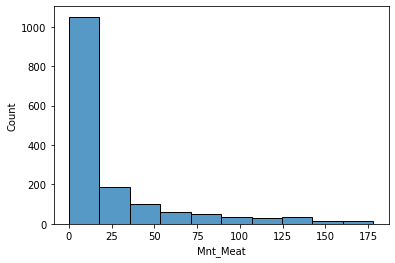

In [1017]:
ax = sns.histplot(df_dis["Mnt_Meat"], bins=10)
print("min Mnt_Meat: ", df_dis["Mnt_Meat"].min())
print("max Mnt_Meat: ", df_dis["Mnt_Meat"].max())

# print the bins ranges
for i in ax.patches:
    print(i.get_x())

In [1018]:
df_dis.loc[ df_dis['Mnt_Meat'] <= 17, 'Mnt_Meat_bin'] = 0
df_dis.loc[(df_dis['Mnt_Meat'] > 17) & (df_dis['Mnt_Meat'] <= 40), 'Mnt_Meat_bin'] = 1
df_dis.loc[(df_dis['Mnt_Meat'] > 40) & (df_dis['Mnt_Meat'] <= 70), 'Mnt_Meat_bin'] = 2
df_dis.loc[(df_dis['Mnt_Meat'] > 70) & (df_dis['Mnt_Meat'] <= 100), 'Mnt_Meat_bin'] = 3
df_dis.loc[ df_dis['Mnt_Meat'] > 100, 'Mnt_Meat_bin'] = 4

In [1019]:
print(df_dis["Mnt_Meat_bin"].value_counts())

0.0    1051
1.0     211
2.0     133
4.0     103
3.0      78
Name: Mnt_Meat_bin, dtype: int64


min Mnt_sweet:  1.0
max Mnt_sweet:  984.0
1.0
99.3
197.6
295.9
394.2
492.5
590.8
689.1
787.4
885.6999999999999


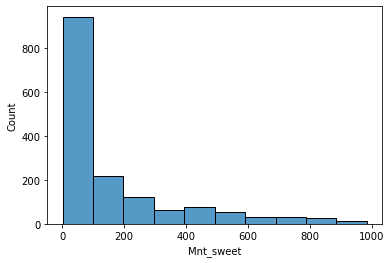

In [1020]:
ax = sns.histplot(df_dis["Mnt_sweet"], bins=10)
print("min Mnt_sweet: ", df_dis["Mnt_sweet"].min())
print("max Mnt_sweet: ", df_dis["Mnt_sweet"].max())

# print the bins ranges
for i in ax.patches:
    print(i.get_x())

In [1021]:
df_dis.loc[ df_dis['Mnt_sweet'] <= 99, 'Mnt_sweet_bin'] = 0
df_dis.loc[(df_dis['Mnt_sweet'] > 99) & (df_dis['Mnt_sweet'] <= 250), 'Mnt_sweet_bin'] = 1
df_dis.loc[(df_dis['Mnt_sweet'] > 250) & (df_dis['Mnt_sweet'] <= 400), 'Mnt_sweet_bin'] = 2
df_dis.loc[(df_dis['Mnt_sweet'] > 400) & (df_dis['Mnt_sweet'] <= 600), 'Mnt_sweet_bin'] = 3
df_dis.loc[ df_dis['Mnt_sweet'] > 600, 'Mnt_sweet_bin'] = 4

In [1022]:
print(df_dis["Mnt_sweet_bin"].value_counts())

0.0    942
1.0    291
3.0    125
2.0    121
4.0     97
Name: Mnt_sweet_bin, dtype: int64


min Mnt_Wines:  0.0
max Mnt_Wines:  232.0
0.0
23.2
46.4
69.6
92.8
116.0
139.2
162.4
185.6
208.79999999999998


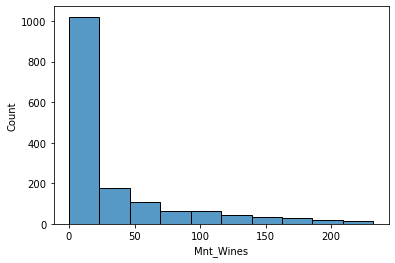

In [1023]:
ax = sns.histplot(df_dis["Mnt_Wines"], bins=10)
print("min Mnt_Wines: ", df_dis["Mnt_Wines"].min())
print("max Mnt_Wines: ", df_dis["Mnt_Wines"].max())

# print the bins ranges
for i in ax.patches:
    print(i.get_x())

In [1024]:
df_dis.loc[ df_dis['Mnt_Wines'] <= 23, 'Mnt_Wines_bin'] = 0
df_dis.loc[(df_dis['Mnt_Wines'] > 23) & (df_dis['Mnt_Wines'] <= 55), 'Mnt_Wines_bin'] = 1
df_dis.loc[(df_dis['Mnt_Wines'] > 55) & (df_dis['Mnt_Wines'] <= 80), 'Mnt_Wines_bin'] = 2
df_dis.loc[(df_dis['Mnt_Wines'] > 80) & (df_dis['Mnt_Wines'] <= 125), 'Mnt_Wines_bin'] = 3
df_dis.loc[ df_dis['Mnt_Wines'] > 125, 'Mnt_Wines_bin'] = 4

In [1025]:
print(df_dis["Mnt_Wines_bin"].value_counts())

0.0    1021
1.0     217
4.0     120
2.0     111
3.0     107
Name: Mnt_Wines_bin, dtype: int64


min Mnt_Gold_Products:  0.0
max Mnt_Gold_Products:  198.0
0.0
19.8
39.6
59.400000000000006
79.2
99.0
118.80000000000001
138.6
158.4
178.20000000000002


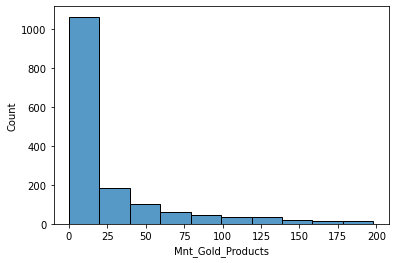

In [1026]:
ax = sns.histplot(df_dis["Mnt_Gold_Products"], bins=10)
print("min Mnt_Gold_Products: ", df_dis["Mnt_Gold_Products"].min())
print("max Mnt_Gold_Products: ", df_dis["Mnt_Gold_Products"].max())

# print the bins ranges
for i in ax.patches:
    print(i.get_x())

In [1027]:
df_dis.loc[ df_dis['Mnt_Gold_Products'] <= 20, 'Mnt_Gold_Products_bin'] = 0
df_dis.loc[(df_dis['Mnt_Gold_Products'] > 20) & (df_dis['Mnt_Gold_Products'] <= 55), 'Mnt_Gold_Products_bin'] = 1
df_dis.loc[(df_dis['Mnt_Gold_Products'] > 55) & (df_dis['Mnt_Gold_Products'] <= 80), 'Mnt_Gold_Products_bin'] = 2
df_dis.loc[(df_dis['Mnt_Gold_Products'] > 80) & (df_dis['Mnt_Gold_Products'] <= 125), 'Mnt_Gold_Products_bin'] = 3
df_dis.loc[ df_dis['Mnt_Gold_Products'] > 125, 'Mnt_Gold_Products_bin'] = 4

In [1028]:
print(df_dis["Mnt_Gold_Products_bin"].value_counts())

0.0    1079
1.0     255
3.0      85
2.0      85
4.0      72
Name: Mnt_Gold_Products_bin, dtype: int64


min Mnt_Fish:  0.0
max Mnt_Fish:  249.0
0.0
24.9
49.8
74.69999999999999
99.6
124.5
149.39999999999998
174.29999999999998
199.2
224.1


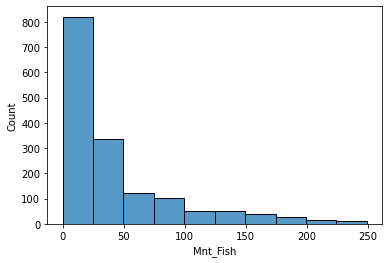

In [1029]:
ax = sns.histplot(df_dis["Mnt_Fish"], bins=10)
print("min Mnt_Fish: ", df_dis["Mnt_Fish"].min())
print("max Mnt_Fish: ", df_dis["Mnt_Fish"].max())

# print the bins ranges
for i in ax.patches:
    print(i.get_x())

In [1030]:
df_dis.loc[ df_dis['Mnt_Fish'] <= 25, 'Mnt_Fish_bin'] = 0
df_dis.loc[(df_dis['Mnt_Fish'] > 25) & (df_dis['Mnt_Fish'] <= 50), 'Mnt_Fish_bin'] = 1
df_dis.loc[(df_dis['Mnt_Fish'] > 50) & (df_dis['Mnt_Fish'] <= 80), 'Mnt_Fish_bin'] = 2
df_dis.loc[(df_dis['Mnt_Fish'] > 80) & (df_dis['Mnt_Fish'] <= 125), 'Mnt_Fish_bin'] = 3
df_dis.loc[ df_dis['Mnt_Fish'] > 125, 'Mnt_Fish_bin'] = 4

In [1031]:
print(df_dis["Mnt_Fish_bin"].value_counts())

0.0    833
1.0    330
2.0    147
4.0    142
3.0    124
Name: Mnt_Fish_bin, dtype: int64


Save the csv file! 

In [1032]:
df.to_csv('marketNew1.csv')